In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# Number of rows and columns in the df
rows, cols = df.shape
print(f'The df has {rows} rows and {cols} columns')

The df has 1470 rows and 35 columns


In [6]:
# checking the missing values in the df
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Number of Categorical and Numerical cols
num, obj = 0,0 
for features in df.columns:
    if df[features].dtype == 'O':
        obj += 1
    else:
        num += 1
print(f"The df has {num} numerical and {obj} categroical features.")

The df has 26 numerical and 9 categroical features.


In [8]:
# Checking the duplicates
print(f'The df has {df.duplicated().sum()} duplicate values.')

The df has 0 duplicate values.


In [9]:
# Understanding the categorical data
for attribute in df.columns:
    if df[attribute].dtype == 'O':
        if df[attribute].nunique() == 1:
            print(f'**{attribute} has 1 unique values.**')
        else:
            print(f'{attribute} has {df[attribute].nunique()} unique values.')

Attrition has 2 unique values.
BusinessTravel has 3 unique values.
Department has 3 unique values.
EducationField has 6 unique values.
Gender has 2 unique values.
JobRole has 9 unique values.
MaritalStatus has 3 unique values.
**Over18 has 1 unique values.**
OverTime has 2 unique values.


In [10]:
# removing the attribute Over18 as it wont contribute to the analysis
del df['Over18']

In [11]:
# Understanding the numerical data
for attribute in df.columns:
    if df[attribute].dtype != 'O':
        if df[attribute].nunique() == 1:
            print(f'**{attribute} has 1 Unique values.**')
        else:
            print(f'{attribute} has {df[attribute].nunique()} unique values.')

Age has 43 unique values.
DailyRate has 886 unique values.
DistanceFromHome has 29 unique values.
Education has 5 unique values.
**EmployeeCount has 1 Unique values.**
EmployeeNumber has 1470 unique values.
EnvironmentSatisfaction has 4 unique values.
HourlyRate has 71 unique values.
JobInvolvement has 4 unique values.
JobLevel has 5 unique values.
JobSatisfaction has 4 unique values.
MonthlyIncome has 1349 unique values.
MonthlyRate has 1427 unique values.
NumCompaniesWorked has 10 unique values.
PercentSalaryHike has 15 unique values.
PerformanceRating has 2 unique values.
RelationshipSatisfaction has 4 unique values.
**StandardHours has 1 Unique values.**
StockOptionLevel has 4 unique values.
TotalWorkingYears has 40 unique values.
TrainingTimesLastYear has 7 unique values.
WorkLifeBalance has 4 unique values.
YearsAtCompany has 37 unique values.
YearsInCurrentRole has 19 unique values.
YearsSinceLastPromotion has 16 unique values.
YearsWithCurrManager has 18 unique values.


In [12]:
# features "StandardHours" and "EmployeeCount" has 1 unique values
# feature "EmployeeNumber" is an ID column
df.drop(columns=['StandardHours', 'EmployeeCount', 'EmployeeNumber'], axis=1, inplace=True)

In [13]:
# Number of rows and columns in the df after primary cleaning
rows, cols = df.shape
print(f'The df has {rows} rows and {cols} columns')

The df has 1470 rows and 31 columns


In [14]:
# Analysing the dependent value
round(df['Attrition'].value_counts()/len(df)*100, 2)

Attrition
No     83.88
Yes    16.12
Name: count, dtype: float64

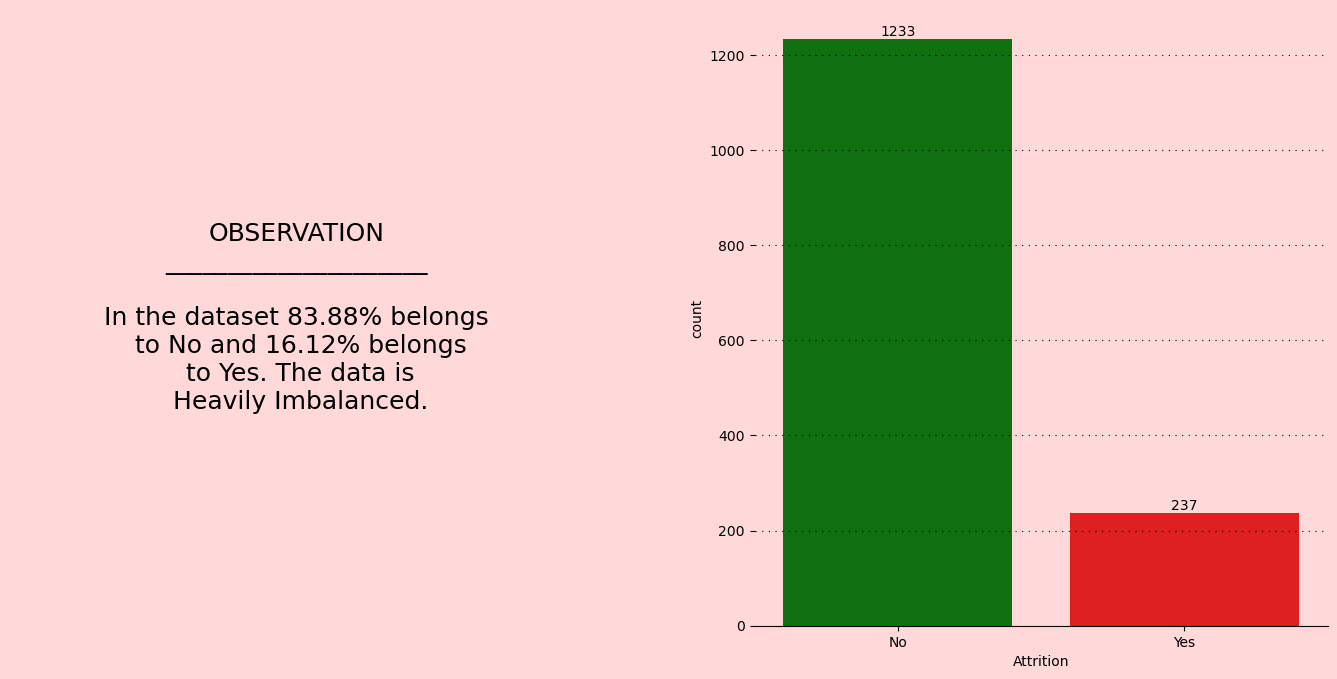

In [15]:
# Analysing the target column

# creating a plot structure
fig = plt.figure(figsize=(17, 8))
spec = fig.add_gridspec(1, 2)
spec.update(wspace=0.3, hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# adding color
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# Plotting the graph for attrition
ax = sns.countplot(x=df['Attrition'],
                   order=df['Attrition'].value_counts().index,
                   palette=['green', 'red'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
sec_2.grid(color='black', axis='y', ls=':', dashes=(1,5))

# Narrating the observation
max, min = round(df['Attrition'].value_counts(normalize=True)*100, 2)
sec_1.text(0.5, 0.5, f'OBSERVATION\n_____________________\n\nIn the dataset {max}% belongs\n to No \
and {min}% belongs\n to Yes. The data is\n Heavily Imbalanced.', va='center', ha='center', size=18)

# Removing the spines and axis
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for position in ['left', 'right', 'top', 'bottom']:
    for section in [sec_1, sec_2]:
        if position == 'bottom' and section == sec_2:
            continue
        else:
            section.spines[position].set_visible(False)

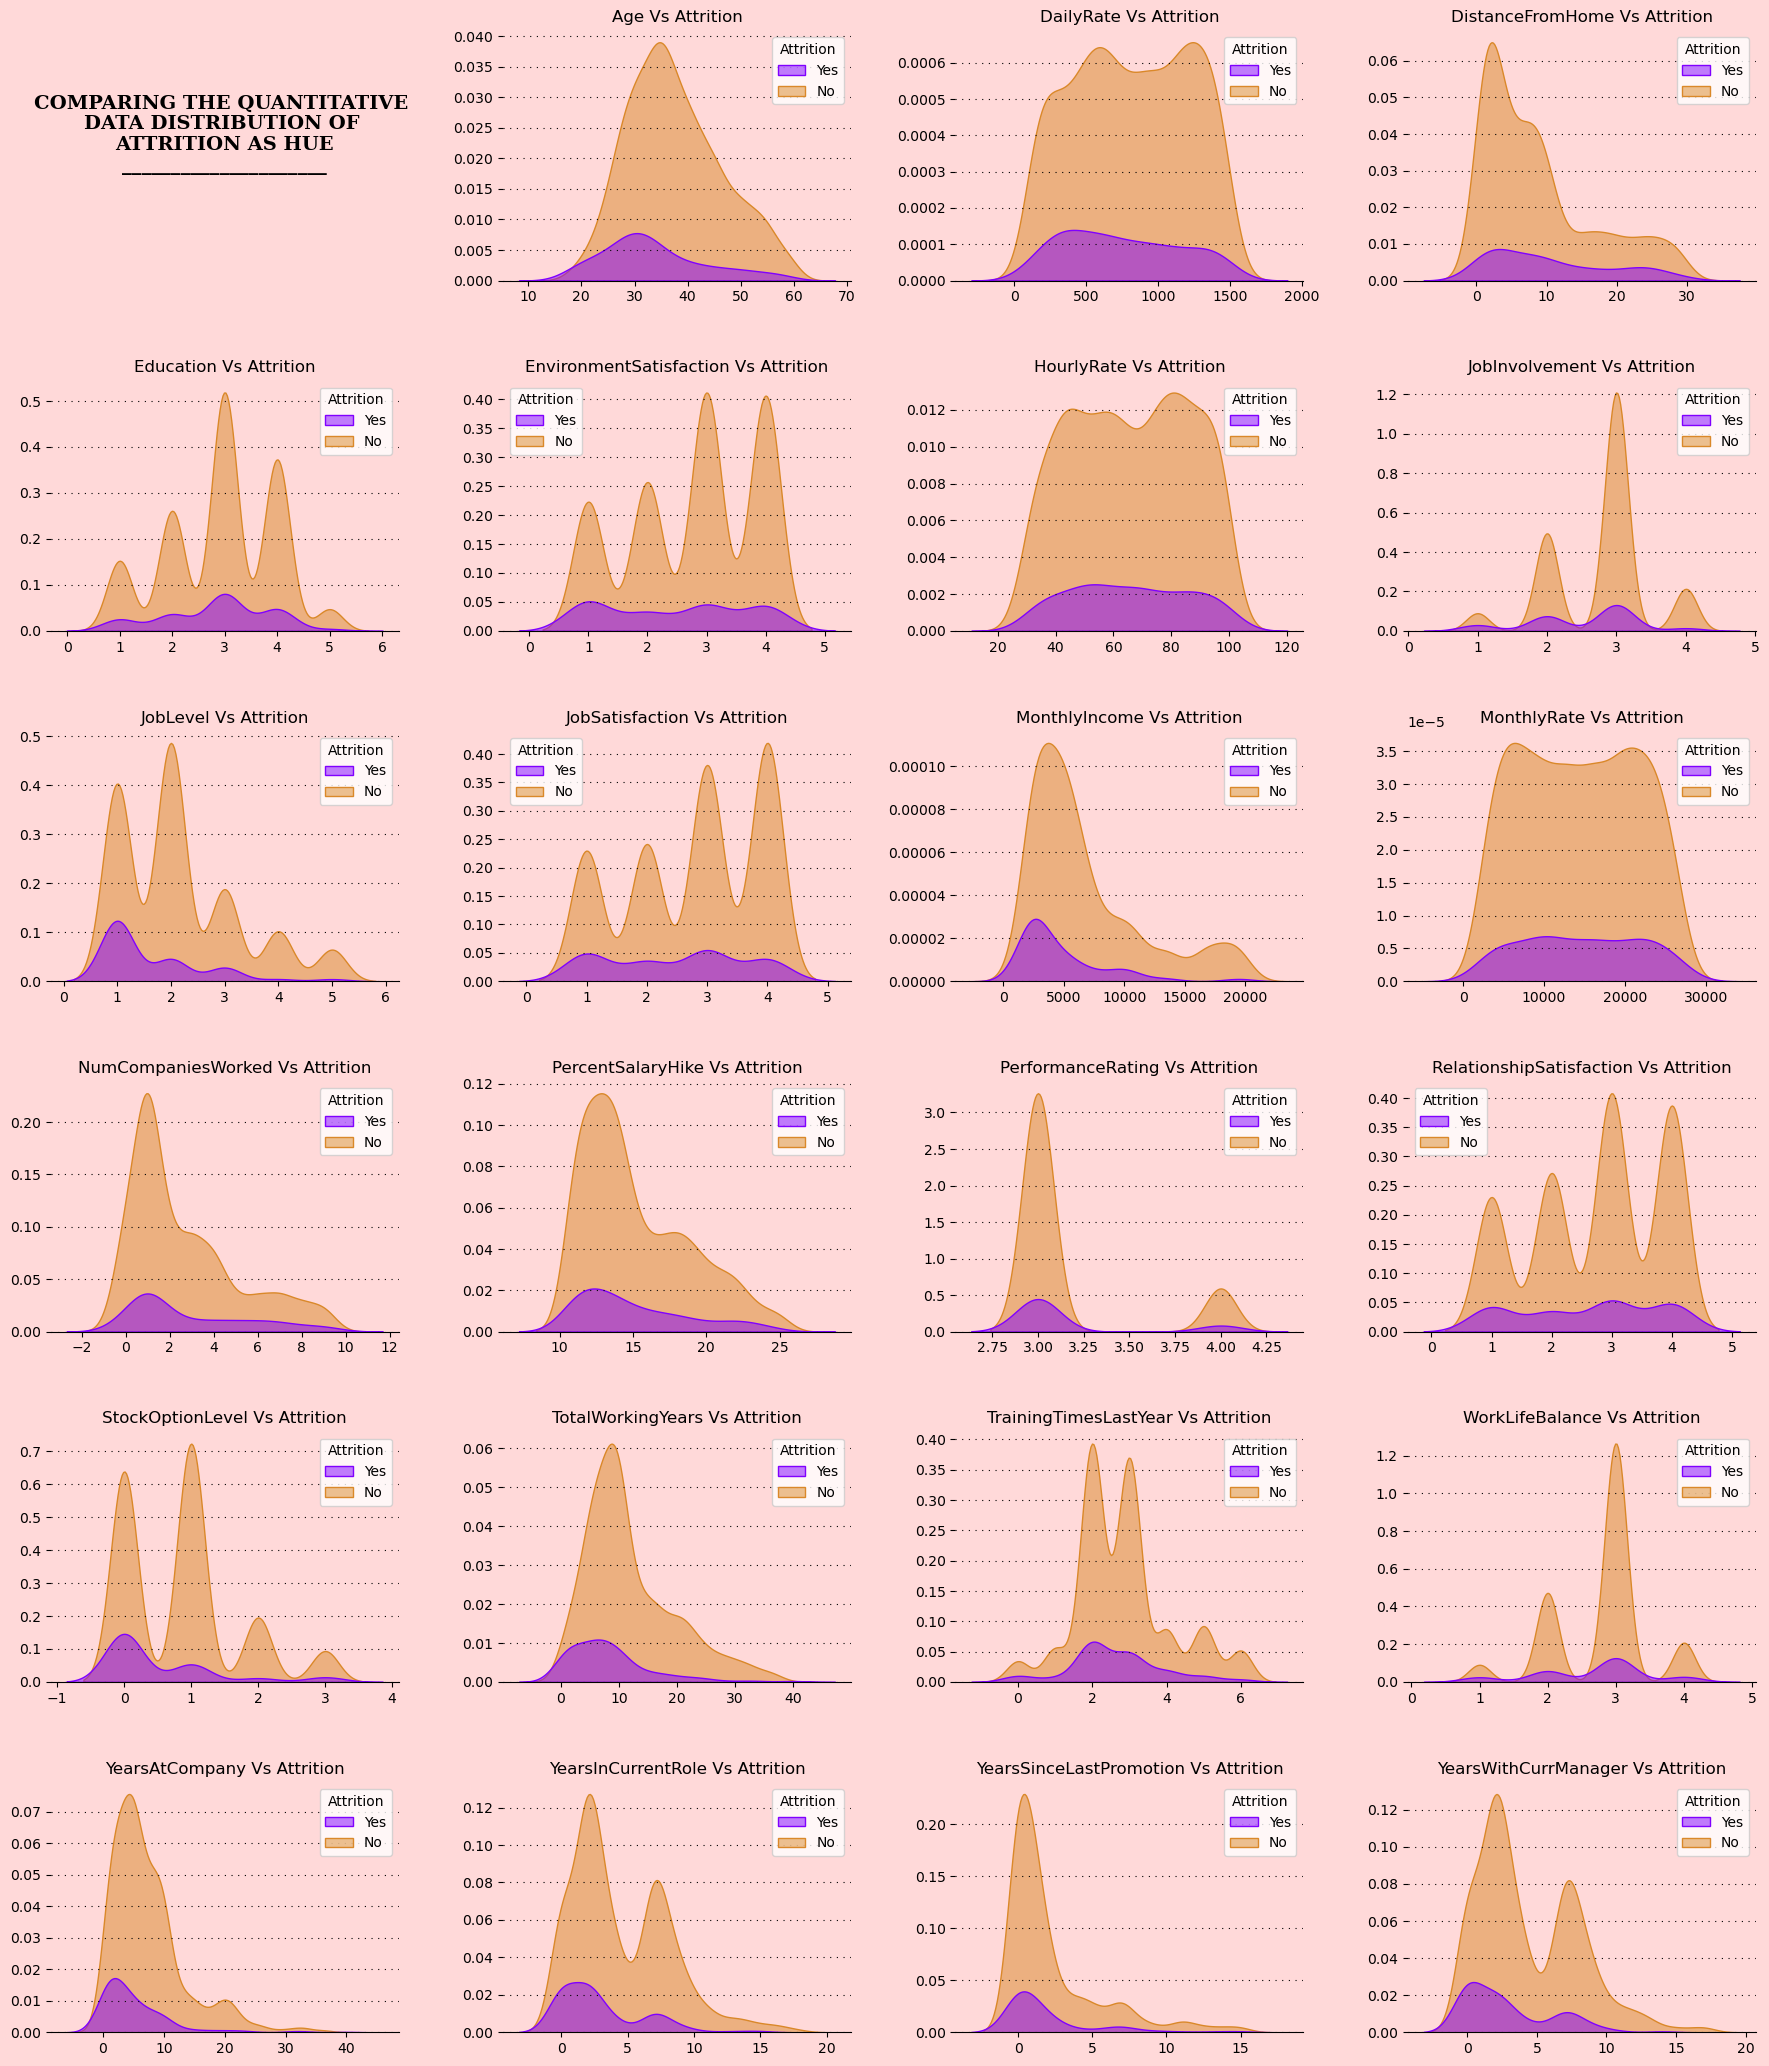

In [16]:
# Comparing the proportion of distribution of targets across numerical classes

# Creating the plot structure
fig = plt.figure(figsize=(22, 26))
spec = fig.add_gridspec(6, 4)
spec.update(wspace=0.3, hspace=0.4)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])

# adding color preference
bg_color = '#ffd9d9'
for section in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16,
                  sec_17, sec_18, sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]:
    section.set_facecolor(bg_color)

# plotting the graph
sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
        sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16,
        sec_17, sec_18, sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]

cnt = 0
for feature in df.columns:
    if df[feature].dtype != 'O':
        sns.kdeplot(df, x=feature, hue='Attrition',
                    fill=True, palette=["#8000ff","#da8829"],
                    alpha=0.5, ax=sec[cnt])
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title(feature+' Vs Attrition')
        sec[cnt].grid(color='#000000', ls=':', axis='y', dashes=(1,5))

        for position in ['left', 'right', 'top']:
            sec[cnt].spines[position].set_visible(False)

        cnt += 1


# Creating plot structure title
sec_01.text(0.5,0.5,'COMPARING THE QUANTITATIVE \nDATA DISTRIBUTION OF \nATTRITION AS HUE\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)

# Removing axis and spines
sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)

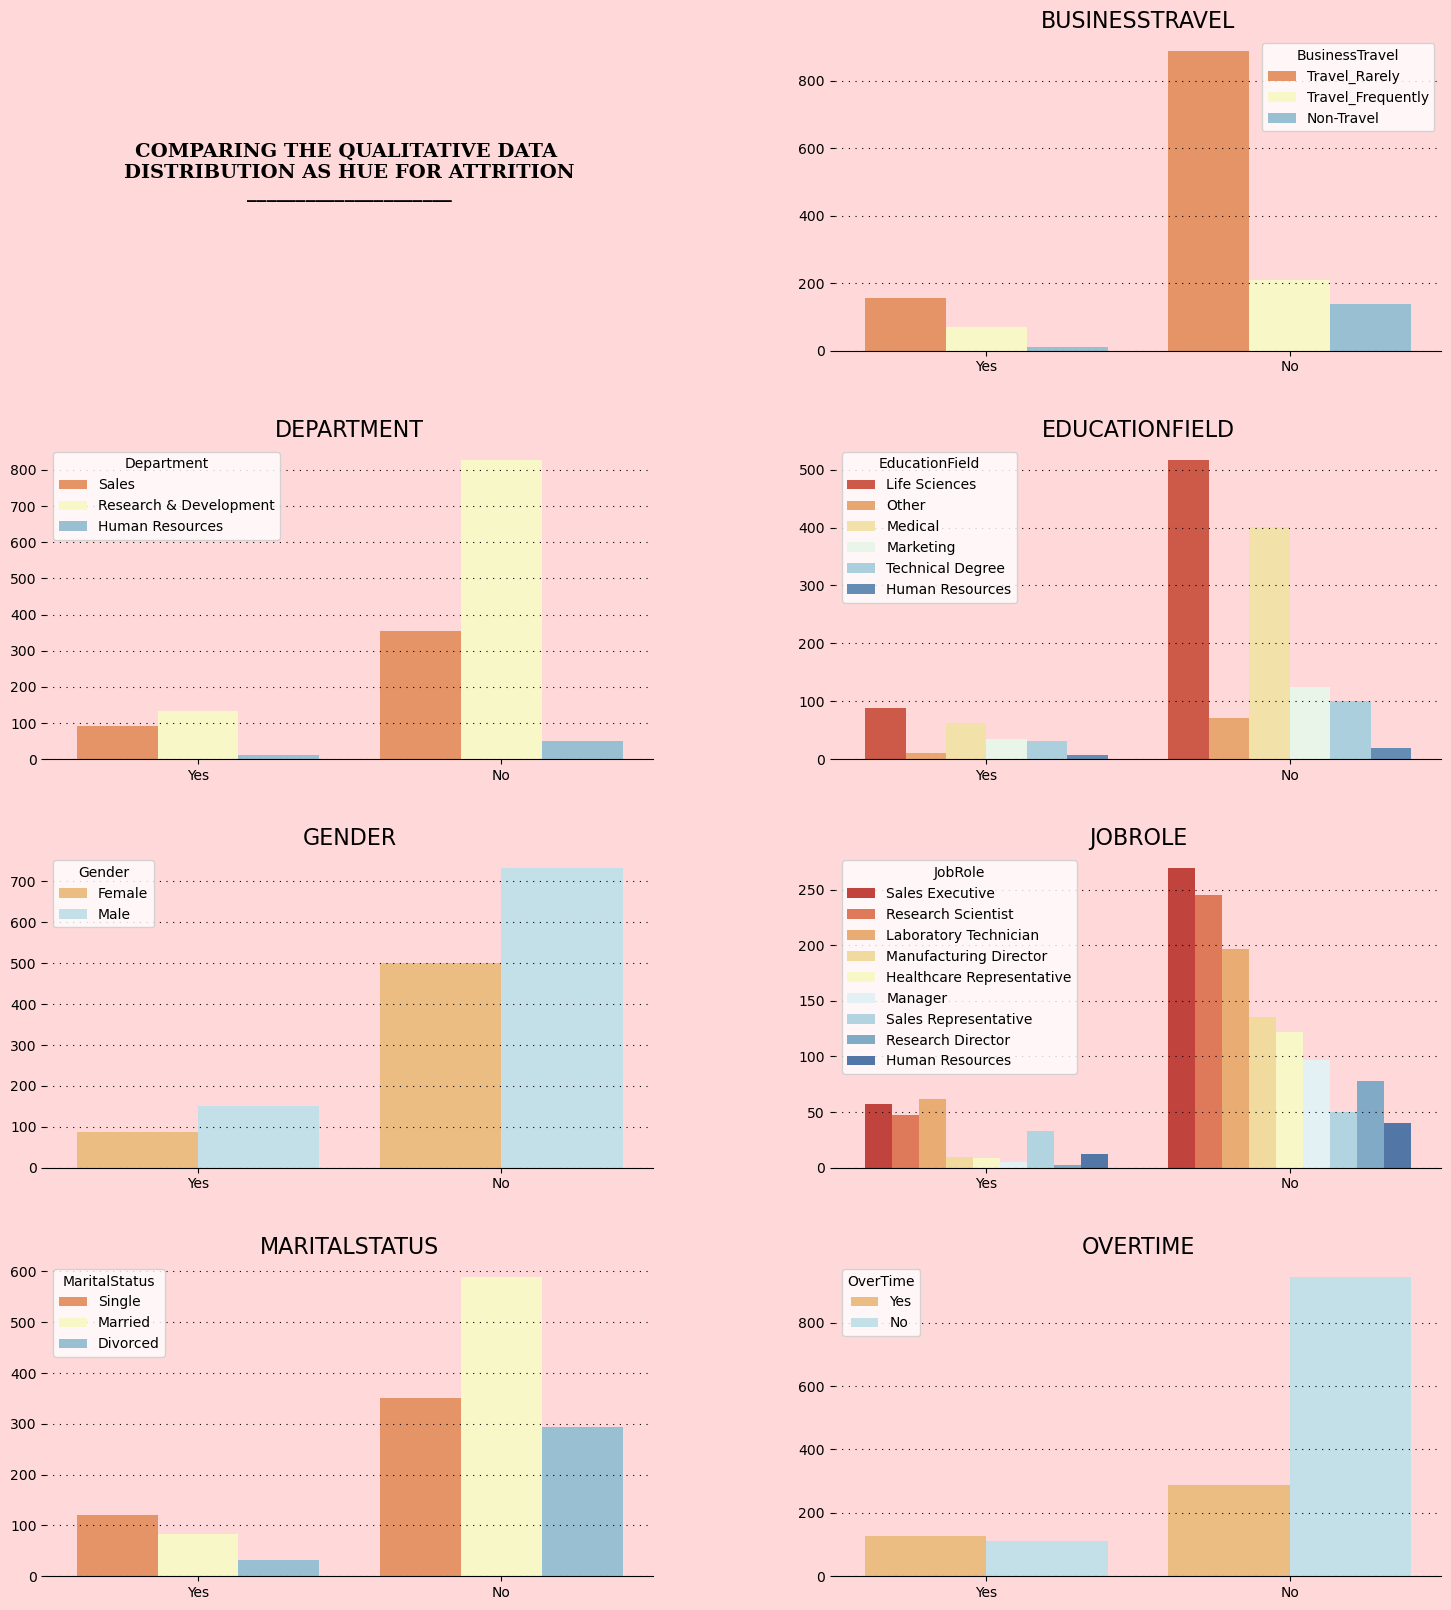

In [17]:
# Comparing the Qualitative Data Distribution As Hue for Attrition
# Creating plot structure
fig = plt.figure(figsize=(18,20))
spec = fig.add_gridspec(4,2)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])
sec_3 = plt.subplot(spec[1,0])
sec_4 = plt.subplot(spec[1,1])
sec_5 = plt.subplot(spec[2,0])
sec_6 = plt.subplot(spec[2,1])
sec_7 = plt.subplot(spec[3,0])
sec_8 = plt.subplot(spec[3,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]:
    selection.set_facecolor(bg_color)

# Plotting graph
sec = [sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]
cnt = 0
for feature in df:
    if df[feature].dtype=='O' and feature != 'Attrition':
        sns.countplot(df, x='Attrition',hue=feature, ax=sec[cnt], palette='RdYlBu')
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title(feature.upper(), fontsize=16)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

        for position in ['top', 'right', 'left']:
            sec[cnt].spines[position].set_visible(False)
        cnt+=1

# Creating plot structure title
sec_1.text(0.5,0.5,'COMPARING THE QUALITATIVE DATA \nDISTRIBUTION AS HUE FOR ATTRITION\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)

# Removing axis and spines
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_1.spines[location].set_visible(False)           

# Uni-Variate Analysis

In [18]:
# creating a dataset where the value of Attrition is "Yes"
df_filtered = df[df['Attrition'] == 'Yes']
df_filtered.shape

(237, 31)

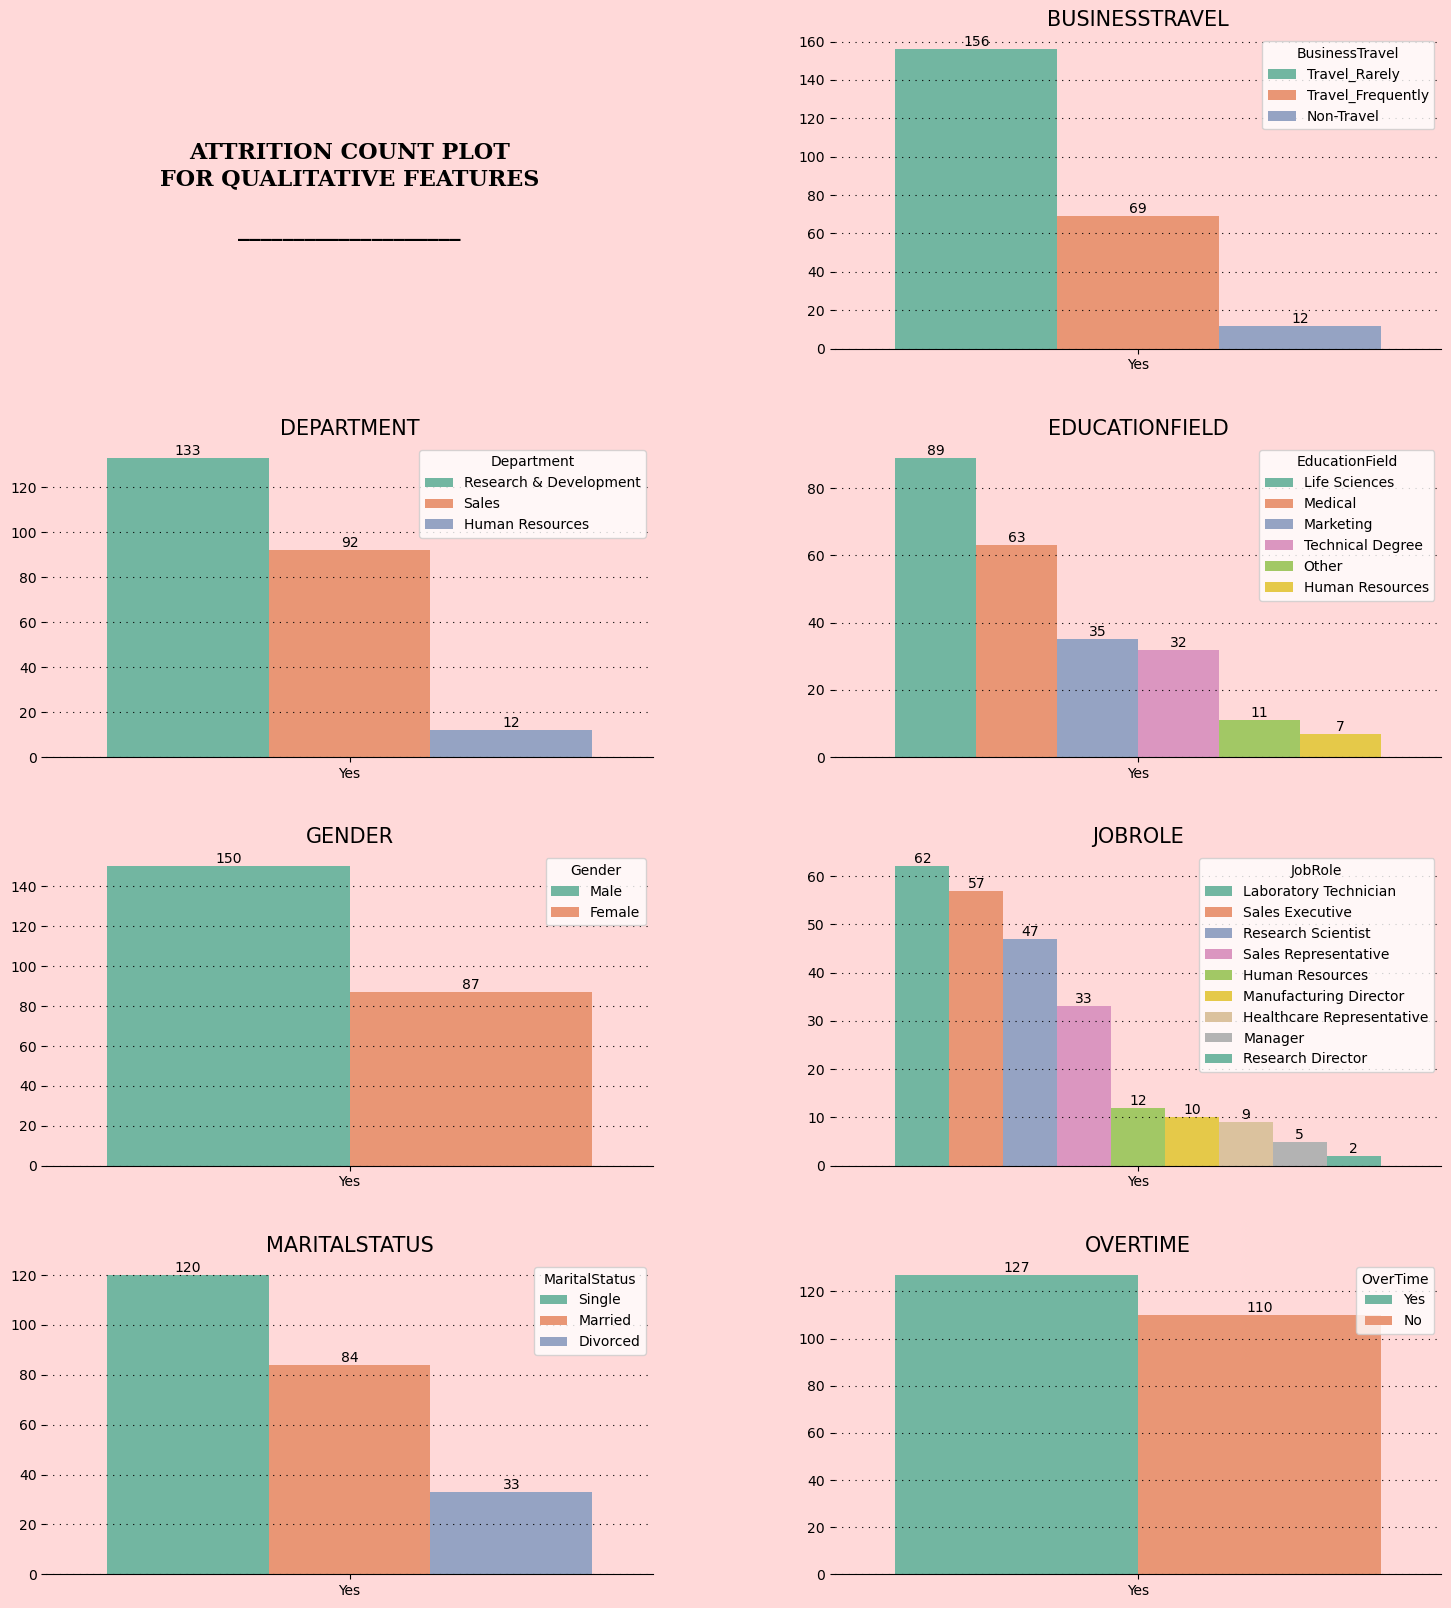

In [19]:
# Attrition Count plot for Qualtitative features
# Count plot for quantitative features
# Creating plot structure
fig = plt.figure(figsize=(18,20))
spec = fig.add_gridspec(4,2)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])
sec_3 = plt.subplot(spec[1,0])
sec_4 = plt.subplot(spec[1,1])
sec_5 = plt.subplot(spec[2,0])
sec_6 = plt.subplot(spec[2,1])
sec_7 = plt.subplot(spec[3,0])
sec_8 = plt.subplot(spec[3,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]:
    selection.set_facecolor(bg_color)

# Plotting graph
axis = [sec_2, sec_3, sec_4, sec_5, sec_6, sec_7,sec_8]
cnt = 0
for feature in df_filtered:
    if df_filtered[feature].dtype=='O' and feature != 'Attrition':
        ax=sns.countplot(df_filtered, x = 'Attrition', hue = feature, ax=axis[cnt],
                      hue_order = df_filtered[feature].value_counts().index, palette='Set2')
        for idx in list(range(0, len(df_filtered[feature].value_counts().index))):
            ax.bar_label(ax.containers[idx])
        axis[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        axis[cnt].set_xlabel("")
        axis[cnt].set_ylabel("")
        axis[cnt].set_title(feature.upper(), fontsize=15)

        # Removing the spines
        for location in ['top', 'right', 'left']:
            axis[cnt].spines[location].set_visible(False)
        cnt+=1

# Creating plot structure title
sec_1.text(0.5,0.5,'ATTRITION COUNT PLOT\nFOR QUALITATIVE FEATURES\n\n____________________',
           ha='center',va='center',size=16,family='serif',weight=600)

# Removing the axis and spines
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for location in ['bottom', 'top', 'right', 'left']:
    sec_1.spines[location].set_visible(False)

# Observation:
- Employees who are male are most likely to attrite.
- Employees from R&D and Sales department are most like to attrite.
- Employees from life science and medical background are most likely to attrite.
- Employees working as Laboratory Technician, Sales Executive, Research Scientist,Sales Representative are most likely to attrite.
- Employees who are single is most likely to attrite.

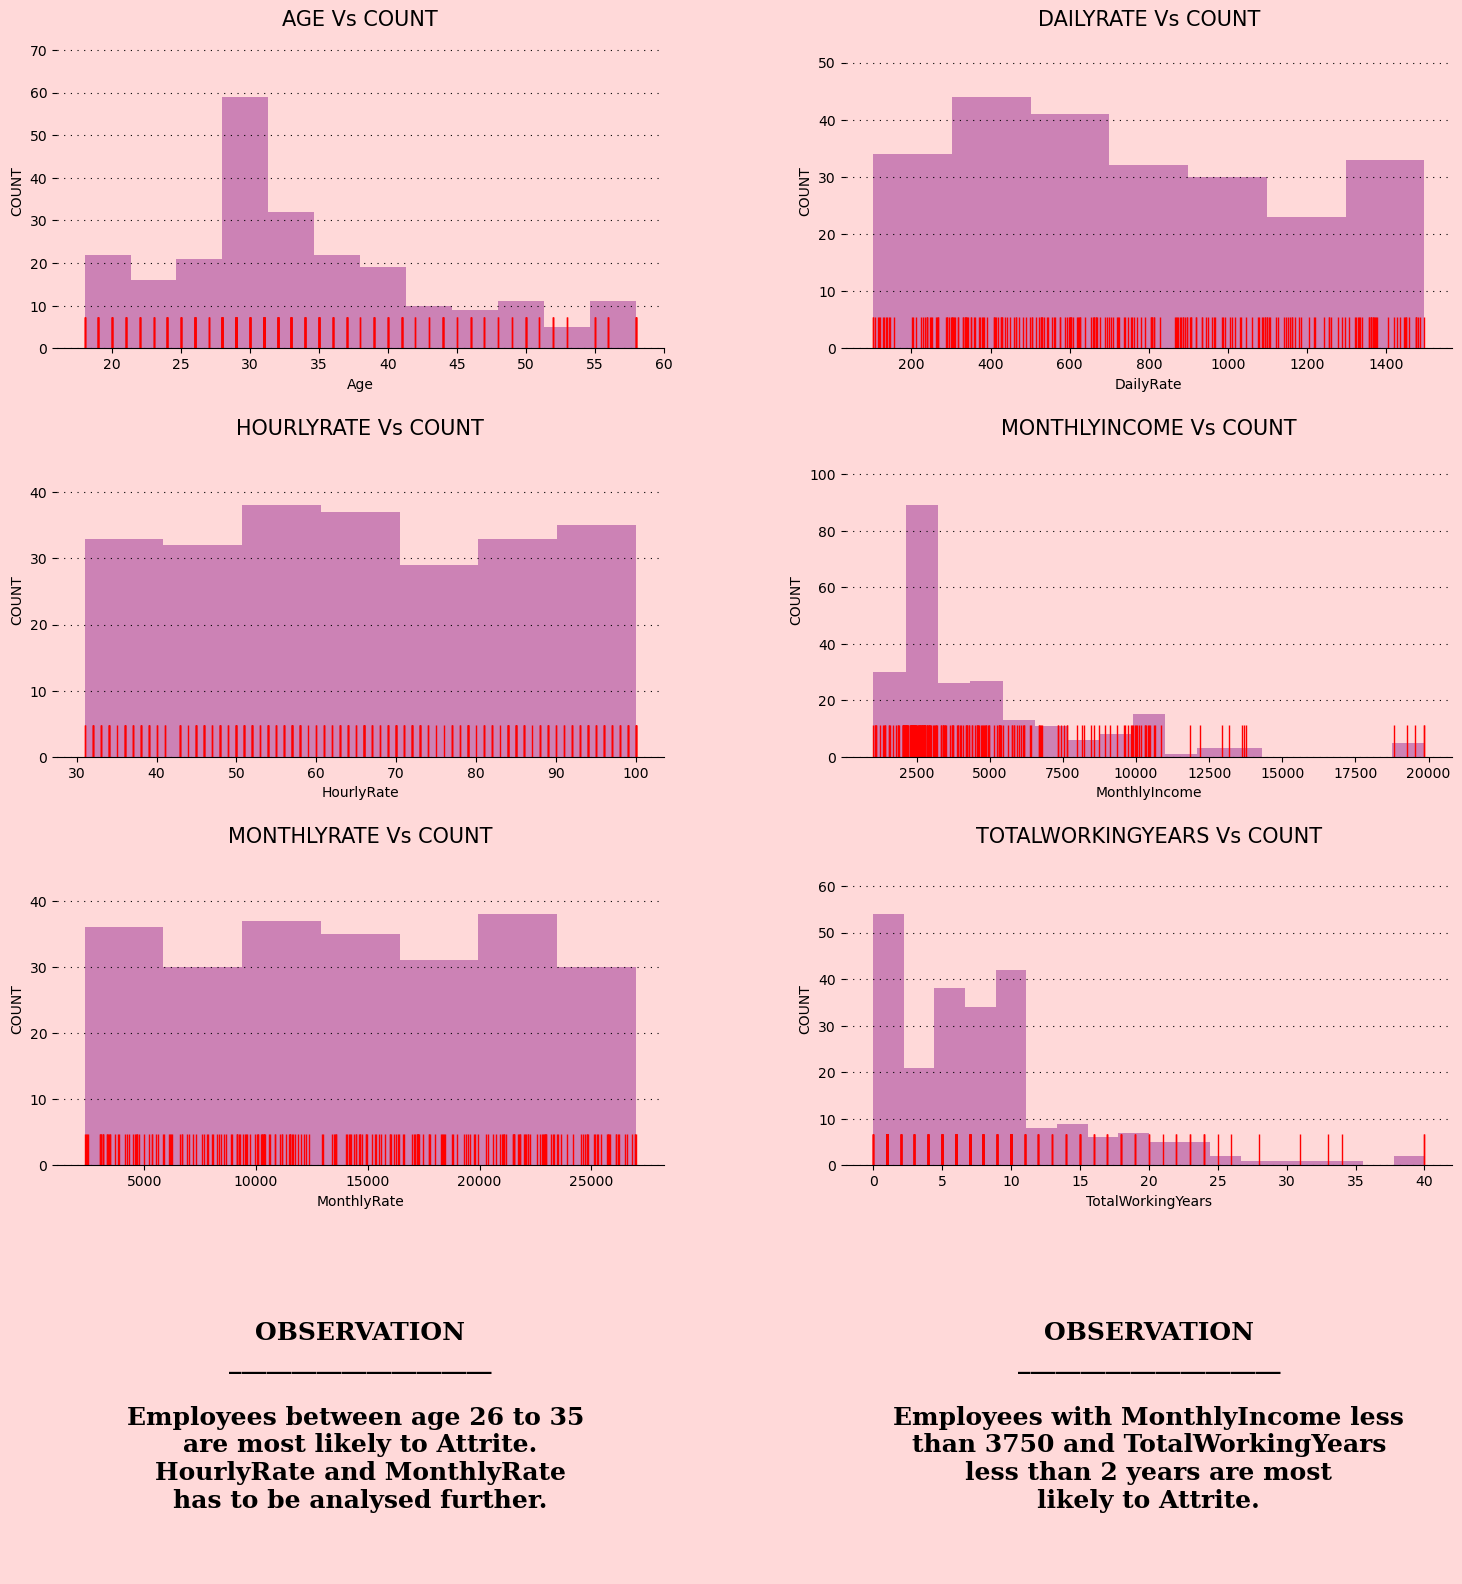

In [20]:
# ploting for quantitative variable with more than 30 unique values

# Creating plot structure
fig = plt.figure(figsize=(18,20))
spec = fig.add_gridspec(4,2)
spec.update(wspace=0.3,hspace=0.3)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[1,0])
sec_4 = fig.add_subplot(spec[1,1])
sec_5 = fig.add_subplot(spec[2,0])
sec_6 = fig.add_subplot(spec[2,1])
sec_7 = fig.add_subplot(spec[3,0])
sec_8 = fig.add_subplot(spec[3,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_1, sec_2, sec_3, sec_4, sec_5, sec_6]
cnt = 0
for feature in df_filtered:
    if len(df_filtered[feature].unique())>30 and df_filtered[feature].dtype!='O':
        sns.distplot(df_filtered[feature], kde=False, rug = True,
                     rug_kws={'height':0.1, 'color':'red'}, color='purple', ax=sec[cnt])
        sec[cnt].set_ylabel("COUNT")
        sec[cnt].set_title(feature.upper()+' Vs COUNT', fontsize=15)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

        # Removing the spines
        for location in ['top', 'right', 'left']:
            sec[cnt].spines[location].set_visible(False)
        cnt += 1

# Narrating the observations
sec_7.text(0.5,0.5,'OBSERVATION\n_____________________\n\nEmployees between age 26 to 35 \
\nare most likely to Attrite.\nHourlyRate and MonthlyRate\
\nhas to be analysed further.',ha='center',va='center',size=18,family='serif',weight=550)

sec_8.text(0.5,0.5,'OBSERVATION\n_____________________\n\nEmployees with MonthlyIncome less\
\nthan 3750 and TotalWorkingYears\nless than 2 years are most\
\nlikely to Attrite.',ha='center',va='center',size=18,family='serif',weight=550)


# Removing the axis and spines
for location in ['top', 'bottom', 'right', 'left']:
    for section in [sec_7, sec_8]:
        section.spines[location].set_visible(False)
        section.xaxis.set_visible(False)
        section.yaxis.set_visible(False)

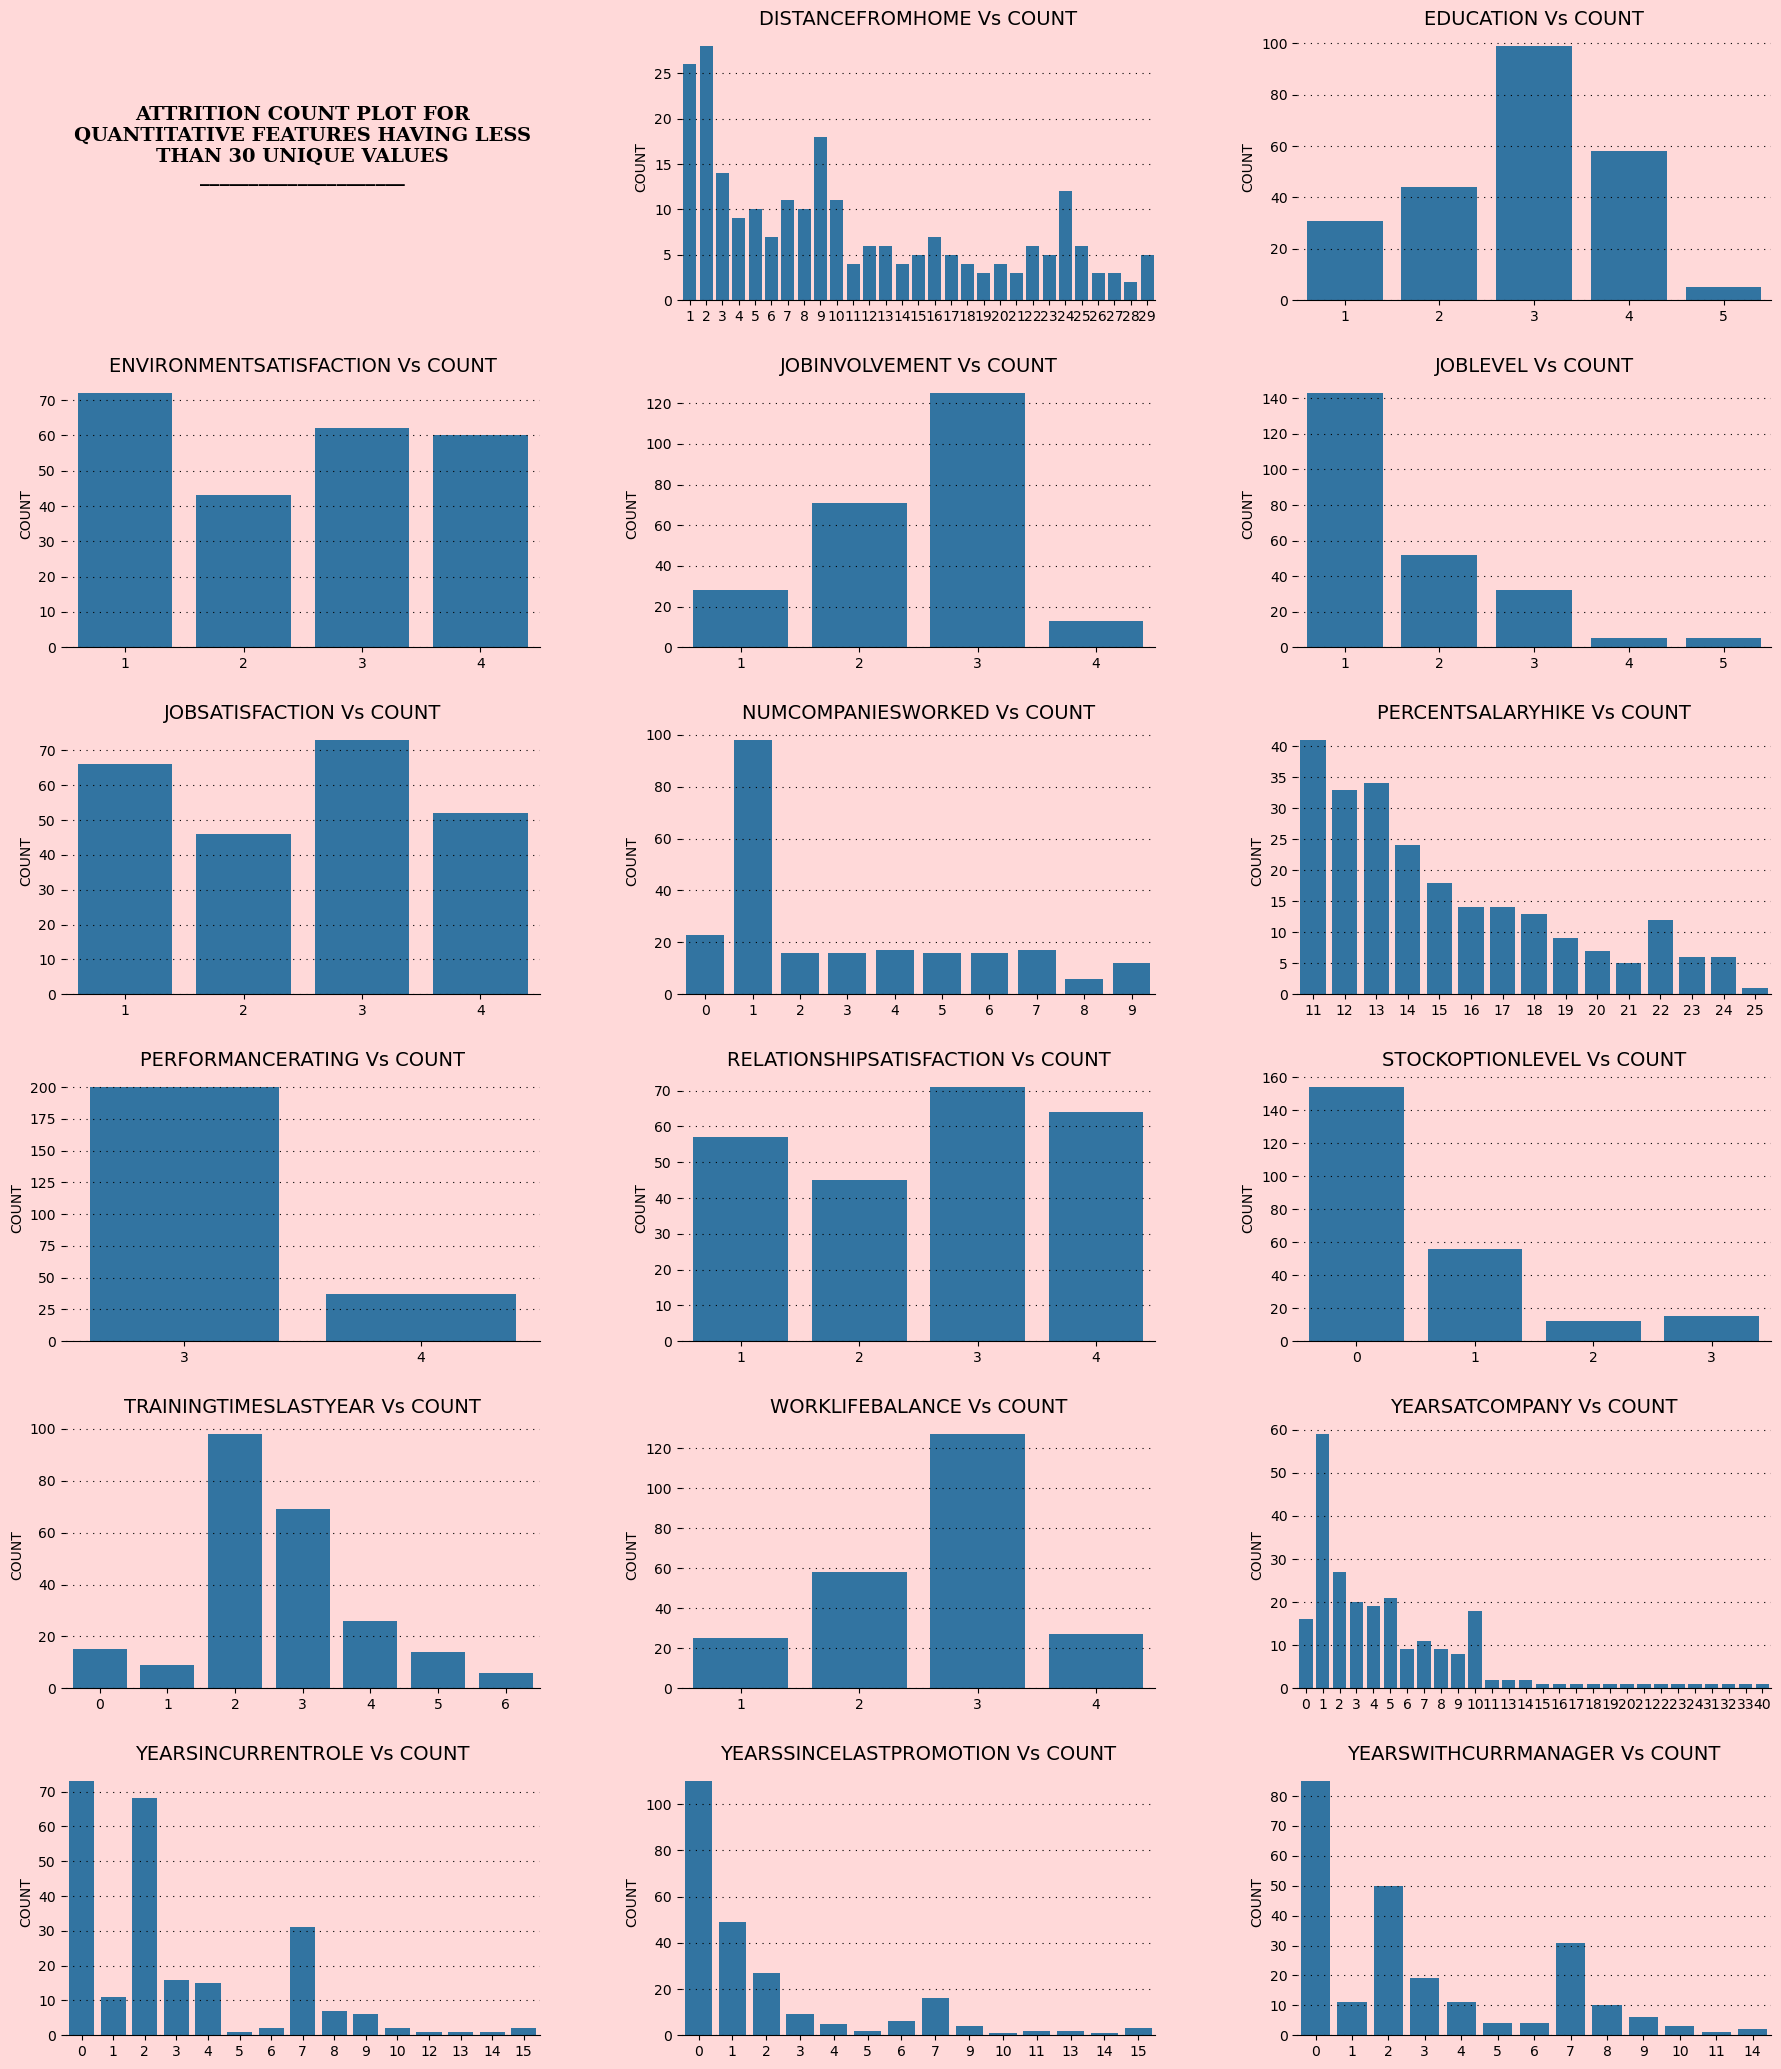

In [21]:
# ploting for quantitative variable with less than 30 unique values

# Creating plot structure
fig = plt.figure(figsize=(22,26))
spec = fig.add_gridspec(6,3)
spec.update(wspace=0.3, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])
sec_07 = fig.add_subplot(spec[2,0])
sec_08 = fig.add_subplot(spec[2,1])
sec_09 = fig.add_subplot(spec[2,2])
sec_10 = fig.add_subplot(spec[3,0])
sec_11 = fig.add_subplot(spec[3,1])
sec_12 = fig.add_subplot(spec[3,2])
sec_13 = fig.add_subplot(spec[4,0])
sec_14 = fig.add_subplot(spec[4,1])
sec_15 = fig.add_subplot(spec[4,2])
sec_16 = fig.add_subplot(spec[5,0])
sec_17 = fig.add_subplot(spec[5,1])
sec_18 = fig.add_subplot(spec[5,2])


# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,sec_09, sec_10,
       sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18]
cnt = 0
for feature in df_filtered:
    if len(df_filtered[feature].unique())<30 and df_filtered[feature].dtype!='O':
        sns.countplot(x=df_filtered[feature],ax=sec[cnt])
        sec[cnt].set_xlabel(''),
        sec[cnt].set_ylabel('COUNT')
        sec[cnt].set_title(feature.upper()+' Vs COUNT', fontsize=14)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

        for location in ['top', 'right', 'left']:
            sec[cnt].spines[location].set_visible(False)

        cnt += 1

# Creating plot structure title
sec_01.text(0.5,0.5,'ATTRITION COUNT PLOT FOR\nQUANTITATIVE FEATURES HAVING LESS\
\nTHAN 30 UNIQUE VALUES\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)

# Removing labels and spines
sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)

# Observation for Quantitative features having less than 30 unique values:
- Employee living nearby are more likely to attrite.
- Employee with education rank 3 and 4 are most likely to attrite.
- Employee with 3rd rank jobinvolvement are most likely to attrite.
- Employee with joblevel 1 are most likely to attrite.
- Employee who have worked only in 1 company are most likely to attrite.
- Employee with less than 14% salary hike are most likely to attrite.
- Employee with performance rating of 3 is most likely to attrite.
- Employee with 0 Stockoption level is most likely to attrite.
- Employee with 2 and 3 times of trainingtimelastyear is most likely to attrite.
- Employee with rank 3 worklifebalance are most likely to attrite.
- Employee having 1 year of experience in the company is more likely to attrite.
- Employee serving in some role for 2 years is most likely to attrite.
- Employee serving with 1 and less than 1 year since last promotion is most likely to attrite.
- Employee serving with less than 1 year with current manager are most likely to attrite.
- Enivornment, job, relationship satisification is nearly equally spread in all ranks.

# Bi-Variate Analysis

In [22]:
# JobRole vs MonthlyIncome
dfmean = df_filtered.groupby('JobRole')['MonthlyIncome'].mean().reset_index()
dfmean.set_index('JobRole', inplace=True)
dfmean.sort_values(by='MonthlyIncome', inplace=True)

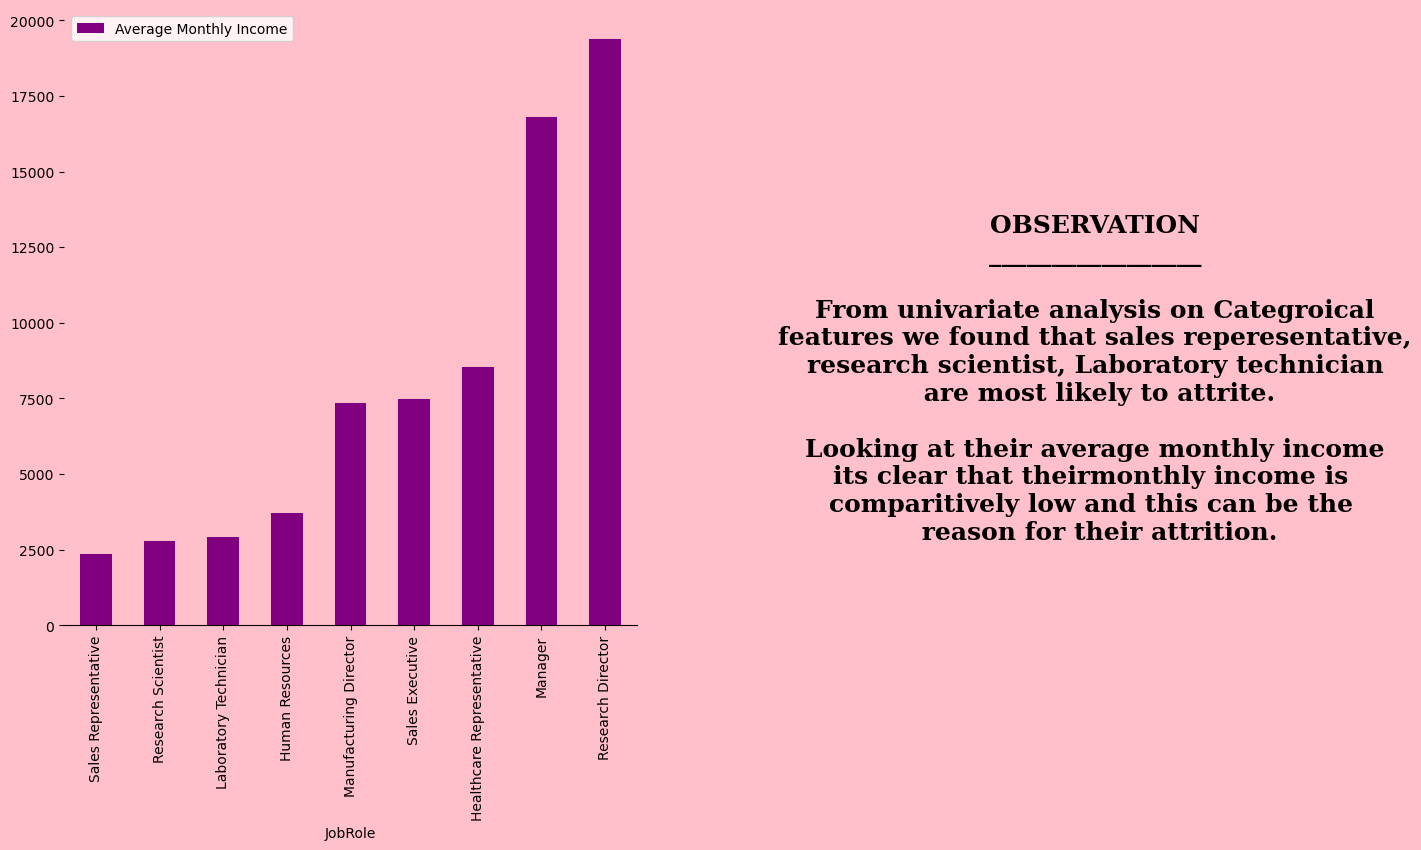

In [23]:
# creating plot structure
fig = plt.figure(figsize=(17,8))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3, hspace=0.15)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])

# Adding the background color
bg_color = 'pink'
for selection in [fig, sec_01, sec_02]:
    selection.set_facecolor(bg_color)

# Plotting the graph
dfmean.plot.bar(color='purple', ax=sec_01)
sec_01.legend(['Average Monthly Income'])


# Narrating the observation
sec_02.text(0.5,0.4, "OBSERVATION\n_________________\n\nFrom univariate analysis on Categroical\
\nfeatures we found that sales reperesentative,\nresearch scientist, Laboratory technician\
\n are most likely to attrite.\n\nLooking at their average monthly income\nits clear that their\
monthly income is \ncomparitively low and this can be the \n reason for their attrition.",
        ha='center', va='center', size=18,family='serif', weight=550)

# removing the spines and labels
sec_02.xaxis.set_visible(False)
sec_02.yaxis.set_visible(False)
for location in ['top','right','left','bottom']:
    for selection in [sec_01,sec_02]:
        if location == 'bottom' and selection == sec_01:
            continue
        else:
            selection.spines[location].set_visible(False)
            

In [24]:
# Analysing Sales Representative for Attrition
salrep_df = df_filtered[df_filtered['JobRole'] == 'Sales Representative']
salrep_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,No,23,4,2,0,10,4,3,5,3,0,3
33,39,Yes,Travel_Rarely,895,Sales,5,3,Technical Degree,4,Male,56,3,2,Sales Representative,4,Married,2086,3335,3,No,14,3,3,1,19,6,4,1,0,0,0
36,50,Yes,Travel_Rarely,869,Sales,3,2,Marketing,1,Male,86,2,1,Sales Representative,3,Married,2683,3810,1,Yes,14,3,3,0,3,2,3,3,2,0,2
127,19,Yes,Travel_Rarely,528,Sales,22,1,Marketing,4,Male,50,3,1,Sales Representative,3,Single,1675,26820,1,Yes,19,3,4,0,0,2,2,0,0,0,0
171,19,Yes,Travel_Frequently,602,Sales,1,1,Technical Degree,3,Female,100,1,1,Sales Representative,1,Single,2325,20989,0,No,21,4,1,0,1,5,4,0,0,0,0


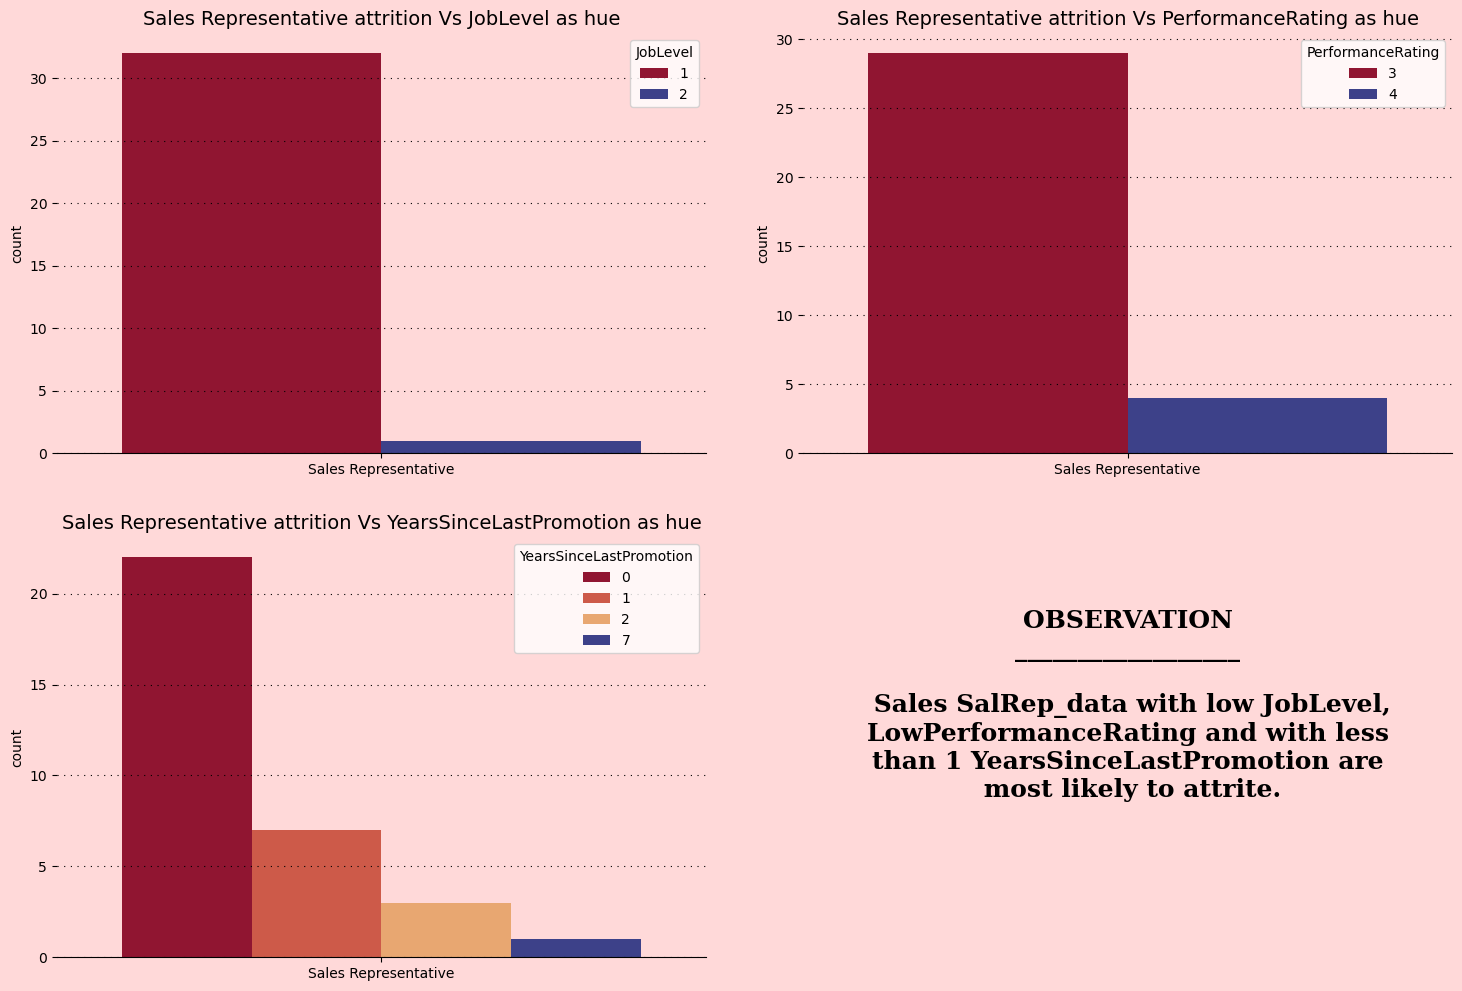

In [25]:
# Creating plot structure
fig = plt.figure(figsize=(18,12))
spec = fig.add_gridspec(2,2)
spec.update(wspace=0.15,hspace=0.2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[1,0])
sec_4 = fig.add_subplot(spec[1,1])

# Adding color preferences
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_1, sec_2, sec_3, sec_4]
cnt = 0
for hue in ['JobLevel', 'PerformanceRating', 'YearsSinceLastPromotion']:
    sns.countplot(salrep_df, x='JobRole', hue=hue, ax=sec[cnt], palette='RdYlBu')
    sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sec[cnt].set_title('Sales Representative attrition Vs '+hue+' as hue', size=14)
    sec[cnt].set_xlabel('')
    for location in ['top', 'right', 'left']:
        sec[cnt].spines[location].set_visible(False)
    cnt+=1

# Narrating the observation
sec_4.text(0.5,0.6,'OBSERVATION\n__________________\n\n Sales SalRep_data with low JobLevel,\
\nLowPerformanceRating and with less\
\nthan 1 YearsSinceLastPromotion are\n most likely to attrite.',
           ha='center',va='center',size=18,weight=550,family='serif')

# Removing axis and spines
sec_4.xaxis.set_visible(False)
sec_4.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_4.spines[location].set_visible(False)

In [26]:
# Attrition based on the number of compaines worked
numcom_df = df_filtered[df_filtered['YearsAtCompany'] == 1]
numcom_df.shape

(59, 31)

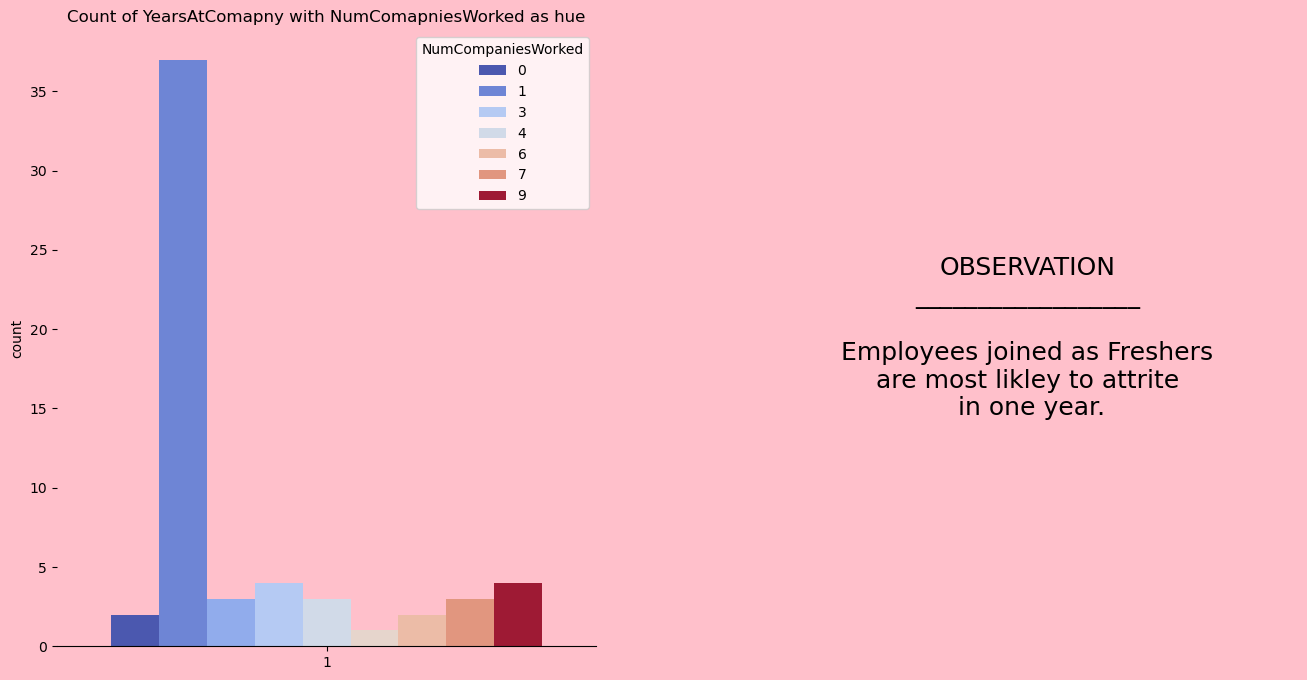

In [27]:
fig = plt.figure(figsize=(16,8))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3, hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# adding bg color
bg_color = 'pink'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sns.countplot(numcom_df, x='YearsAtCompany', hue='NumCompaniesWorked', palette='coolwarm',ax=sec_1)
sec_1.set_title('Count of YearsAtComapny with NumComapniesWorked as hue')
sec_1.set_xlabel('')

# narrating the observation
sec_2.text(0.5, 0.5,'OBSERVATION\n__________________\n\nEmployees joined as Freshers\
\nare most likley to attrite\n in one year.',
          ha='center', va='center',size=18)

# Removing the labels and spines
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top','bottom','right','left']:
    for selection in [sec_1,sec_2]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)

In [28]:
# Analysing on attrition based on age

# Creating a new column for range of age
condition = [df_filtered['Age'].between(18, 25),
             df_filtered['Age'].between(26, 35),
             df_filtered['Age'].between(36, 45),
             df_filtered['Age'].between(46, 59)]

values = ['18 to 25', '26 to 35', '36 to 45', '46 to 59']

df_filtered['AgeRange'] = np.select(condition, values)

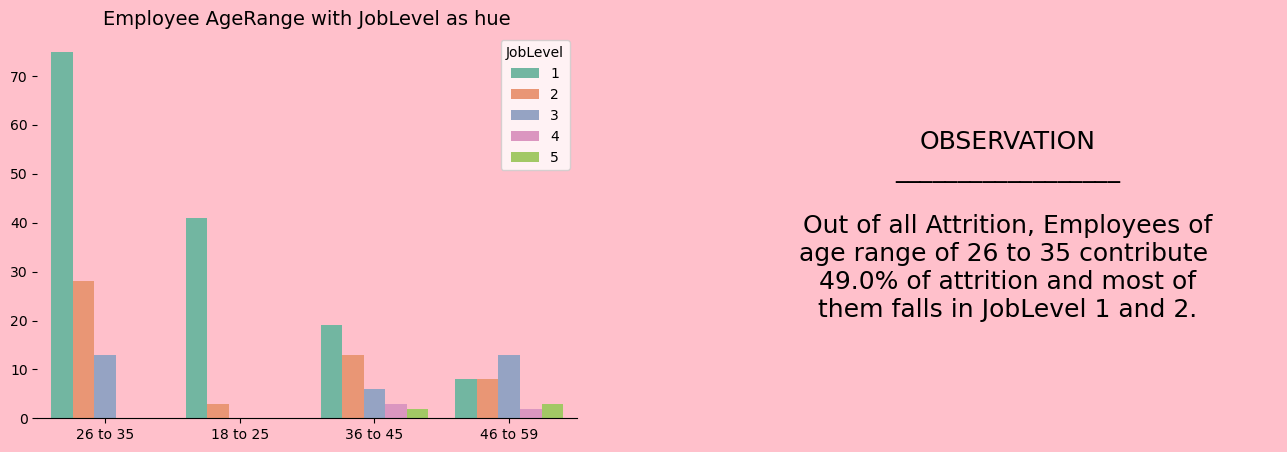

In [29]:
# Creating the plot structure
fig = plt.figure(figsize=(16,5))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3, hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# Adding bg color
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor('pink')

# Plotting the graph
sns.countplot(df_filtered, x='AgeRange', hue='JobLevel',order=df_filtered['AgeRange'].value_counts().index,
              palette = 'Set2', ax=sec_1)
sec_1.set_xlabel('')
sec_1.set_ylabel('')
sec_1.set_title('Employee AgeRange with JobLevel as hue', fontsize=14)

# Narrating the observation
row, column = df_filtered.shape
cnt = (df_filtered.AgeRange == '26 to 35').sum()
value = np.round((cnt/row),2)*100
sec_2.text(0.5,0.5,f'OBSERVATION\n__________________\n\nOut of all Attrition, Employees of\
\nage range of 26 to 35 contribute \n{value}% of attrition and most of\nthem falls in JobLevel 1 and 2.',
           ha='center',va='center',size=18)

# Removing spines and axis
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top','right','bottom','left']:
    for selection in [sec_1,sec_2]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)

In [30]:
df.shape

(1470, 31)

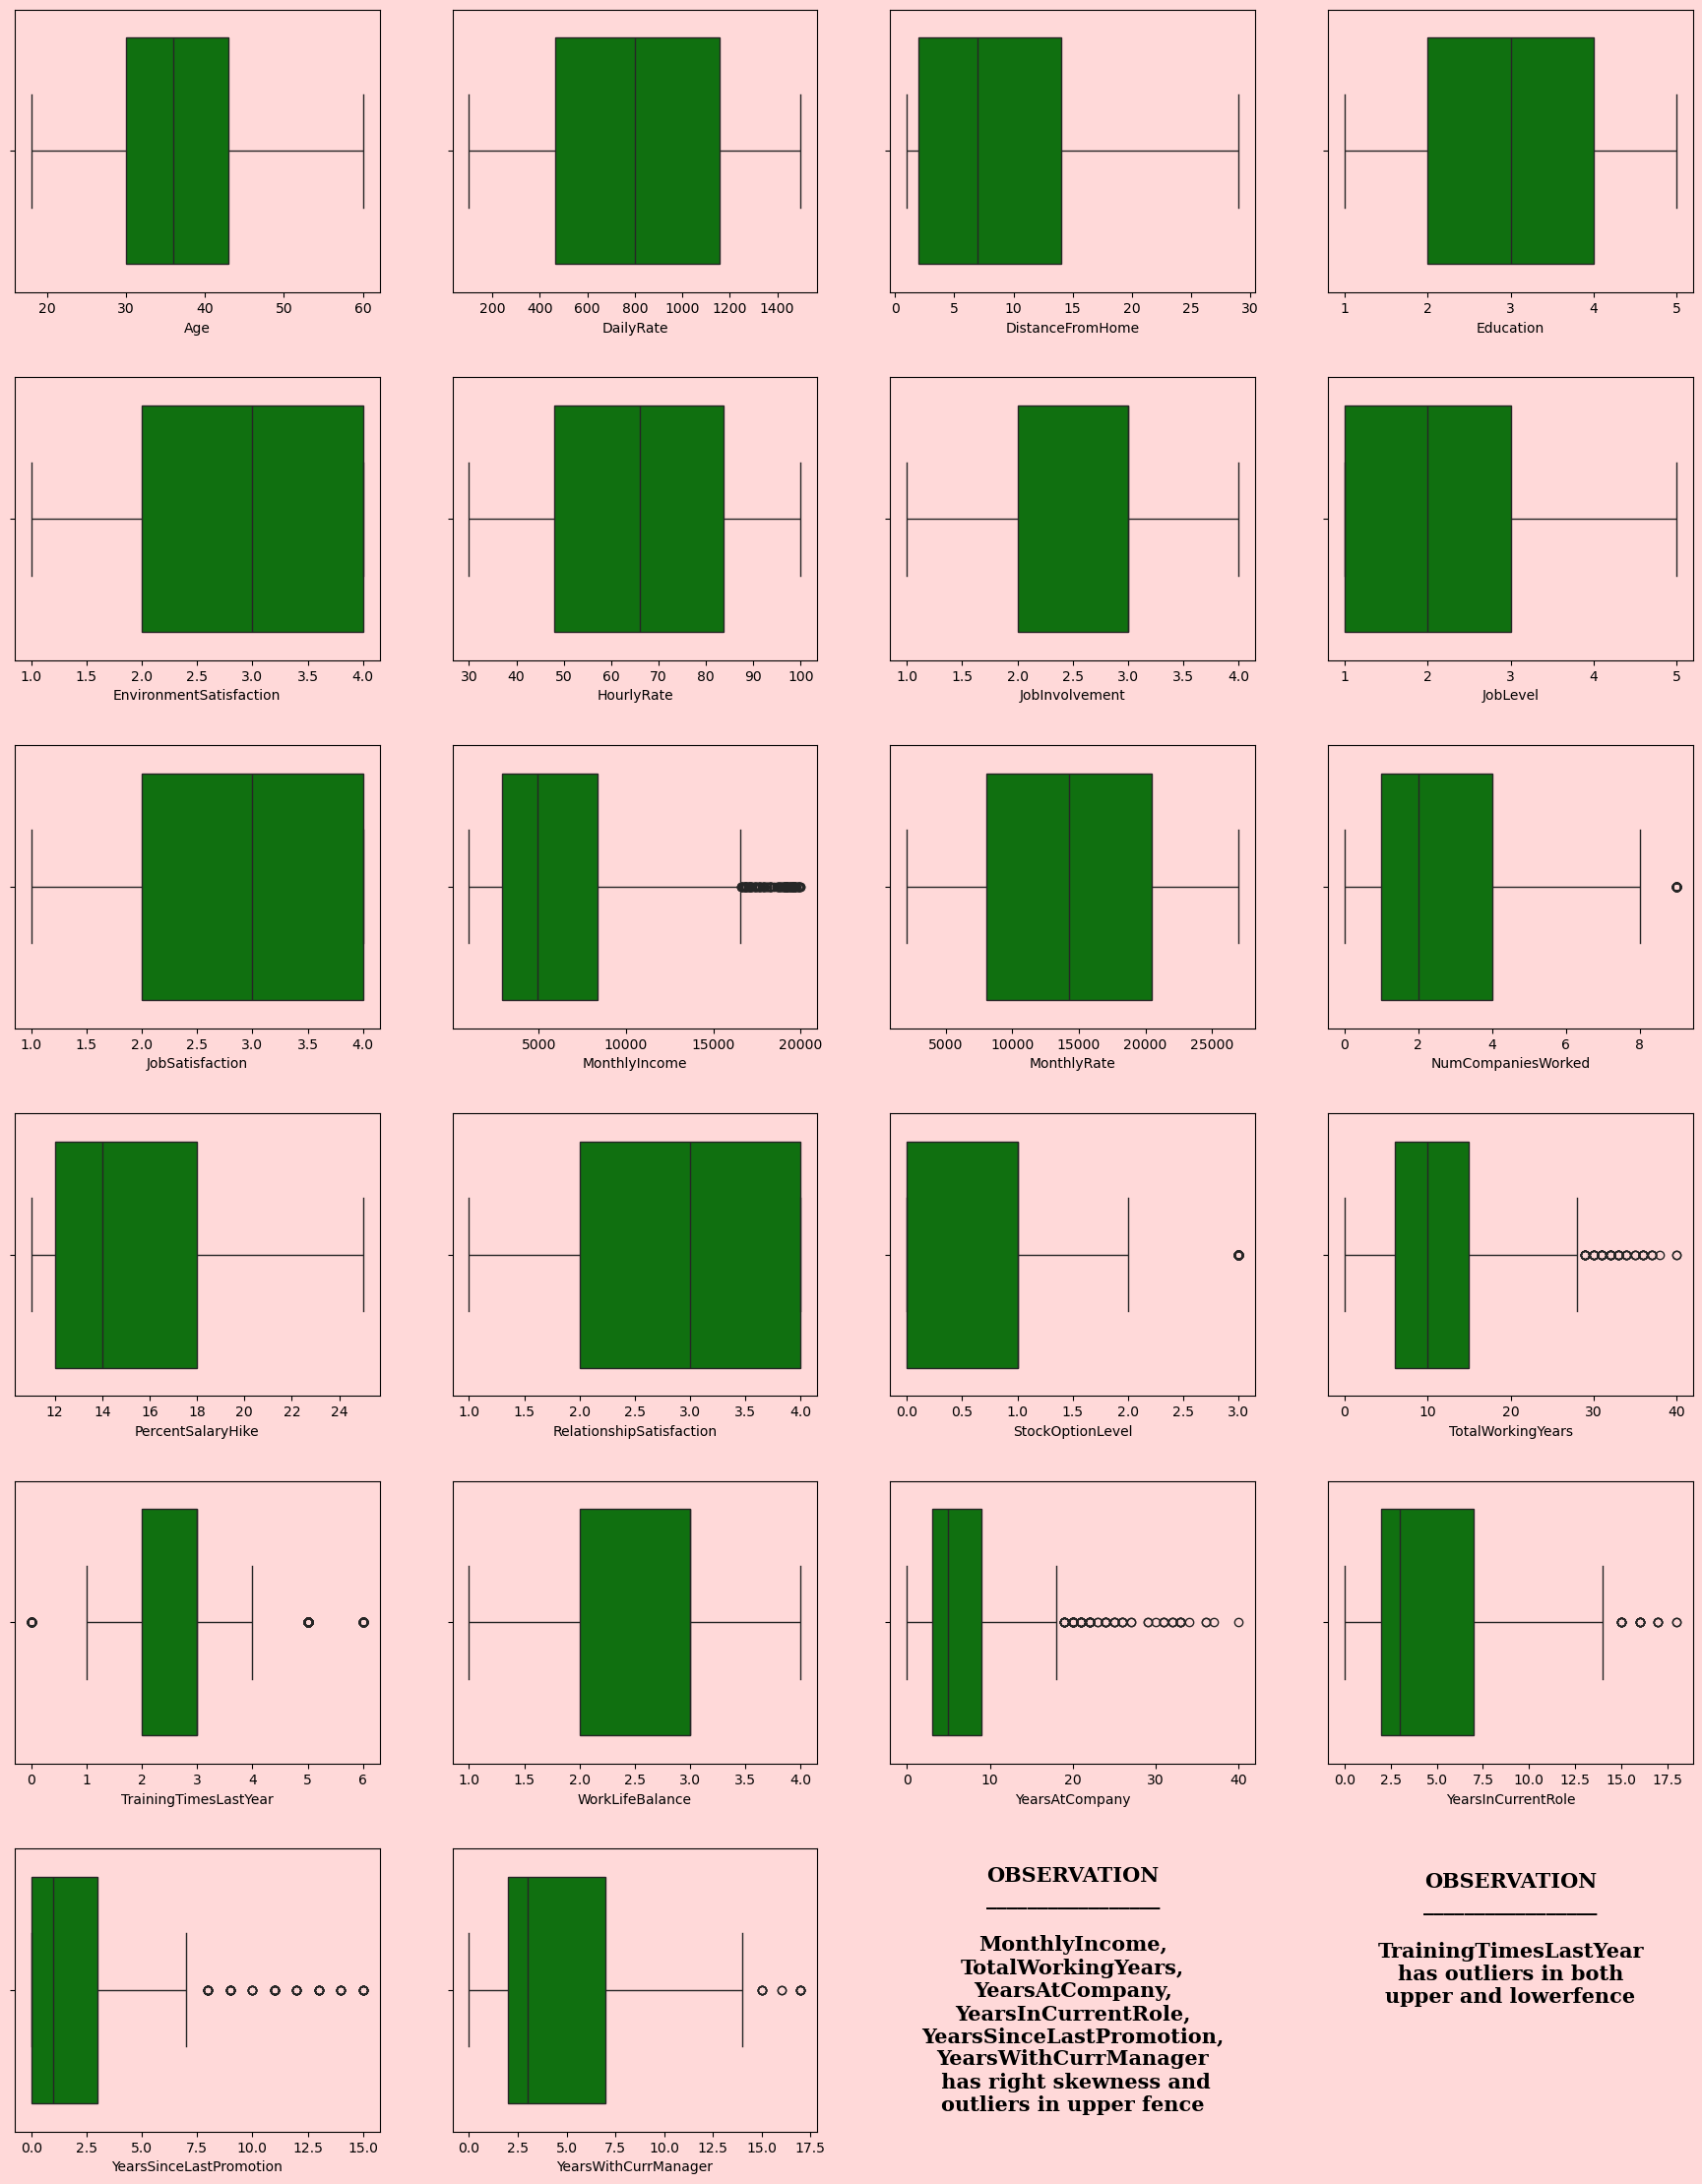

In [31]:
# Create the figure and gridspec
fig = plt.figure(figsize=(22, 28))
spec = fig.add_gridspec(6, 4)
spec.update(wspace=0.2, hspace=0.3)
axes = [fig.add_subplot(spec[i, j]) for i in range(6) for j in range(4)]

# Set background color
bg_color = '#ffd9d9'
fig.set_facecolor(bg_color)
for ax in axes:
    ax.set_facecolor(bg_color)

# Checking Outliers in the dataset
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O' and len(df[feature].unique()) > 2]
for idx, feature in enumerate(numeric_features):
    if idx < 22:  # Ensure only valid subplots are used
        sns.boxplot(df[feature], orient='h', ax=axes[idx], color='green')

# Narating the observations
axes[22].text(
    0.5, 0.5,
    'OBSERVATION\n_________________\n\n\
MonthlyIncome,\nTotalWorkingYears,\nYearsAtCompany,\nYearsInCurrentRole,\
\nYearsSinceLastPromotion,\nYearsWithCurrManager\n has right skewness and\
\noutliers in upper fence',
    ha='center', va='center', size=15, family='serif', weight=600
)
axes[23].text(
    0.5, 0.68,
    'OBSERVATION\n_________________\n\n\
TrainingTimesLastYear\nhas outliers in both\nupper and lowerfence',
    ha='center', va='center', size=15, family='serif', weight=600
)

# Removing axis and spines
for ax in axes[22:24]:
    ax.axis('off')
plt.show()

In [32]:
# Handling the outliers in the dataset
for feature in df:
    if df[feature].dtype != 'O' and len(df[feature].unique())>2:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)
        IQR = q3 - q1
        lower_quartile = q1 - (1.5*IQR)
        upper_quartile = q3 + (1.5*IQR)

        df[feature] = np.where(df[feature] > upper_quartile, upper_quartile, df[feature])
        df[feature] = np.where(df[feature] < lower_quartile, lower_quartile, df[feature])       

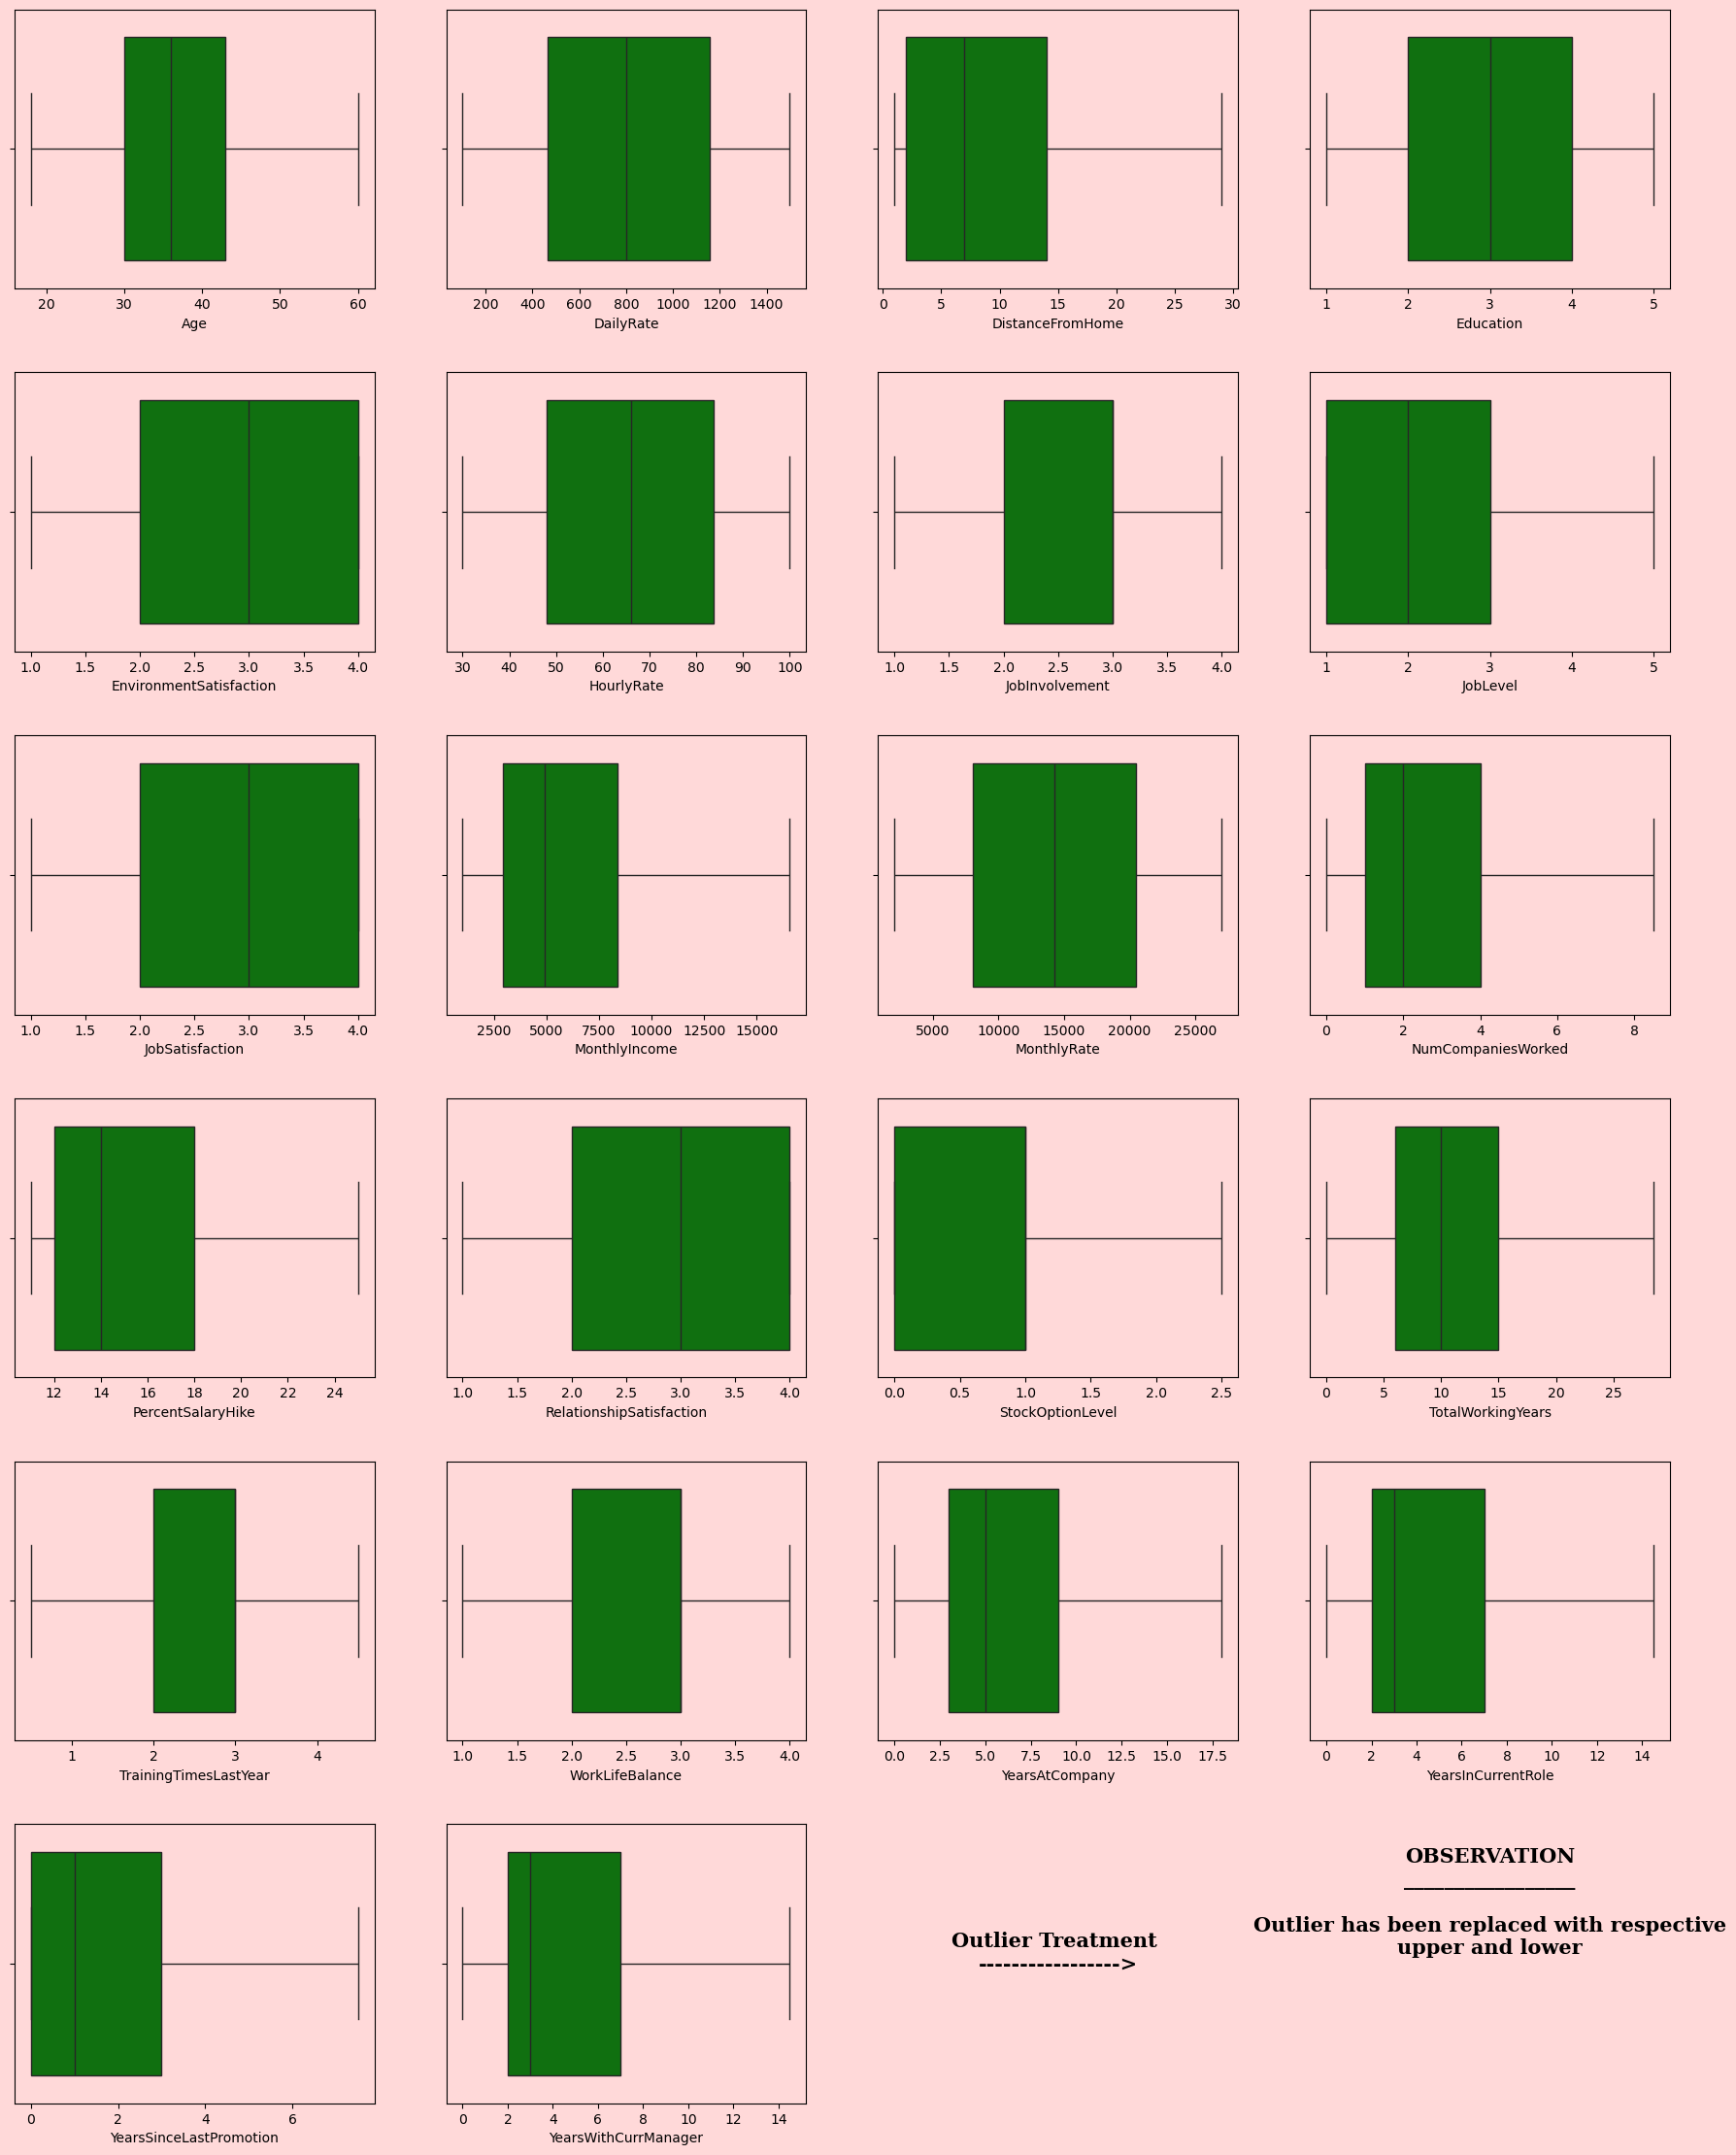

In [33]:
# After handling the outlier plotting the graph
# Create the figure and gridspec
fig = plt.figure(figsize=(22, 28))
spec = fig.add_gridspec(6, 4)
spec.update(wspace=0.2, hspace=0.3)
axes = [fig.add_subplot(spec[i, j]) for i in range(6) for j in range(4)]

# Set background color
bg_color = '#ffd9d9'
fig.set_facecolor(bg_color)
for ax in axes:
    ax.set_facecolor(bg_color)

# Checking Outliers in the dataset
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O' and len(df[feature].unique()) > 2]
for idx, feature in enumerate(numeric_features):
    if idx < 22:  # Ensure only valid subplots are used
        sns.boxplot(df[feature], orient='h', ax=axes[idx], color='green')

# Narating the observations
axes[22].text(
    0.5, 0.5,
    'Outlier Treatment \n----------------->\n',
    ha='center', va='center', size=15, family='serif', weight=600
)
axes[23].text(
    0.5, 0.68,
    'OBSERVATION\n_________________\n\n\
Outlier has been replaced with respective\nupper and lower\n',
    ha='center', va='center', size=15, family='serif', weight=600
)

# Removing axis and spines
for ax in axes[22:24]:
    ax.axis('off')
plt.show()

In [34]:
# Splitting the data into dep and indep variable
x = df.drop('Attrition', axis=1)
y = df['Attrition']

In [35]:
# Encoding the categorical variables using OneHotEncoder
x = pd.get_dummies(x, columns=['OverTime','MaritalStatus','JobRole','Gender','EducationField',
                             'Department','BusinessTravel'],drop_first=True)
x = x.astype(int)

In [36]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_Yes,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Male,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,8,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1


In [37]:
# balancing the data using SMOTE approach
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

In [38]:
from sklearn.preprocessing import LabelEncoder
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.DataFrame(y, columns=['Attrition'])

In [39]:
y.value_counts()

Attrition
0            1233
1            1233
Name: count, dtype: int64

In [40]:
# Splitting the data into train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

# Scale the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
x_train_sc = pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc = pd.DataFrame(x_test_sc, columns=x_test.columns)

# Building Logistic Regression Model:

In [41]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=42)
# training the model
logit.fit(x_train_sc, y_train)
# prediction
y_pred_train = logit.predict(x_train_sc)
y_pred_test  = logit.predict(x_test_sc)

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred_test))
print()
print('Accuracy Score for logit_training :',accuracy_score(y_train, y_pred_train))
print('Accuracy Score for logit_test :', accuracy_score(y_test, y_pred_test))
print()
print("Confusion Matrix for logit :\n",confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       247
           1       0.91      0.89      0.90       247

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494


Accuracy Score for logit_training : 0.9173427991886409
Accuracy Score for logit_test : 0.902834008097166

Confusion Matrix for logit :
 [[225  22]
 [ 26 221]]


# Building RandomForest model

In [42]:
from sklearn.ensemble import RandomForestClassifier
# build and train rf
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(x_train_sc, y_train)
# prediction
y_pred_train_rf1 = rf1.predict(x_train_sc)
y_pred_test_rf1 = rf1.predict(x_test_sc)
# Evaluation
print(classification_report(y_test, y_pred_test_rf1))
print()
print('Accuracy_Score for rf_train :',accuracy_score(y_train, y_pred_train_rf1))
print('Accuracy_Score for rf_test :',accuracy_score(y_test, y_pred_test_rf1))
print()
print("Confusion Matrix for RF :\n",confusion_matrix(y_test, y_pred_test_rf1))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       247
           1       0.93      0.91      0.92       247

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494


Accuracy_Score for rf_train : 1.0
Accuracy_Score for rf_test : 0.917004048582996

Confusion Matrix for RF :
 [[229  18]
 [ 23 224]]


# Building Support Vector Machine Model

In [43]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, random_state=42)
# training the model
svm.fit(x_train_sc, y_train)
# Prediction
y_pred_train_svm = svm.predict(x_train_sc)
y_pred_test_svm = svm.predict(x_test_sc)
# Evaluation
print(classification_report(y_test, y_pred_test_svm))
print()
print('Accuracy_Score for svm_train :', accuracy_score(y_train, y_pred_train_svm))
print('Accuracy_Score for svm_test :', accuracy_score(y_test, y_pred_test_svm))
print()
print("Confusion Matrix for svm :\n",confusion_matrix(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.96      0.86      0.91       247

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494


Accuracy_Score for svm_train : 0.962474645030426
Accuracy_Score for svm_test : 0.9129554655870445

Confusion Matrix for svm :
 [[238   9]
 [ 34 213]]


# Building the XGBoost Model

In [44]:
#!pip install xgboost

In [45]:
import xgboost as xgb
from xgboost import XGBClassifier
# build and train model
xgb_clf = XGBClassifier(n_estimators = 100, learning_rate=0.1, max_depth=5,random_state=42)
xgb_clf.fit(x_train_sc, y_train)
# Prediction
y_pred_train_xgb = xgb_clf.predict(x_train_sc)
y_pred_test_xgb = xgb_clf.predict(x_test_sc)
# Evaluation
print(classification_report(y_test, y_pred_test_xgb))
print()
print("Training Accuracy for xgb_clf:", accuracy_score(y_train, y_pred_train_xgb))
print("Test Accuracy for xgb_clf :", accuracy_score(y_test, y_pred_test_xgb))
print()
print("Confusion Matrix for xgb_clf :\n",confusion_matrix(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       247
           1       0.91      0.90      0.91       247

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494


Training Accuracy for xgb_clf: 0.9954361054766734
Test Accuracy for xgb_clf : 0.9068825910931174

Confusion Matrix for xgb_clf :
 [[226  21]
 [ 25 222]]
